# 수입 우범화물 선별 데이터 분석

In [1]:
# 모델 구현 시간 체크
import time
# 시작시간 체크
start = time.time()

In [1]:
# 패키지 로딩
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
# 수입 데이터 로딩 (가상데이터)
data= pd.read_csv('train.csv', encoding='CP949')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [4]:
data

신고번호        신고일자  통관지세관부호  신고인부호    수입자부호  해외거래처부호  특송업체부호  \
0      57298928  2020-01-01      121  2O5A2  82ZHWNL      NaN  TQ18AK   
1      85092852  2020-01-01       30  305K5  5IS70LE      NaN     NaN   
2      63014158  2020-01-01       20  CGMT6  GJ5KBL3  R9ZQOG7     NaN   
3      40175917  2020-01-01       40  QWUTG  PBYW02T      NaN     NaN   
4      11602631  2020-01-01       30  0X1CO  MCX0GJB  4Z9PX0Y     NaN   
...         ...         ...      ...    ...      ...      ...     ...   
76832  94508764  2020-09-30       40  3A8I7  BECE6R3  FYZA0QQ     NaN   
76833  17853106  2020-09-30       40  QK03W  2WEWINH  QUM8VZX     NaN   
76834  26558010  2020-09-30       40  S86Q6  GIWBVU7  PHNRCZY     NaN   
76835  48138979  2020-09-30       40  OGZCI  N3UTDBA  8DJ0WHZ  ID7FLR   
76836  81391181  2020-09-30       40  CGMT6  LIPZTZ4  ZLF7Q7N  QJ0YGH   

      수입통관계획코드 수입신고구분코드  수입거래구분코드  ...  운송수단유형코드  반입보세구역부호    HS10단위부호  \
0            D        B        15  ...        10   2106003  8481900000   
1            C        B        11  ...        40   4077010  2106909099   
2            D        B        11  ...        40   4077007  6307909000   
3            C        B        94  ...        40   4077106  6505009090   
4            C        B        11  ...        40   2006075  6204320000   
...        ...      ...       ...  ...       ...       ...         ...   
76832        C        D        11  ...        10   4077003  8703241020   
76833        B        B        91  ...        10   1612033  9209999000   
76834        D        B        91  ...        40   4002001  3203001990   
76835        D        B        87  ...        50   6277033  1513199000   
76836        D        B        15  ...        40   2010033  8703241020   

       적출국가코드  원산지국가코드  관세율구분코드   관세율   검사결과코드 우범여부 핵심적발  
0          US       US        A   8.0       N3    1    1  
1          US       US        A   8.0        A    0    0  
2          US       US        A  10.0        A    0    0  
3          CN       CN        A   8.0        A    0    0  
4          CN       CN     FCN1   5.2    M1_N1    1    1  
...       ...      ...      ...   ...      ...  ...  ...  
76832      AE       AE        C   8.0        A    0    0  
76833      JP       JP        A   8.0  A_N5_D6    1    1  
76834      CN       CN     FCN1   0.0      A_K    0    0  
76835      US       US        A   3.0       F2    1    2  
76836      AE       AE        C   8.0       N3    1    1  

[76837 rows x 24 columns]

# 데이터 분석

In [5]:
# 데이터 사이즈 확인
data.shape

(76837, 24)

## 우범여부/핵심적발

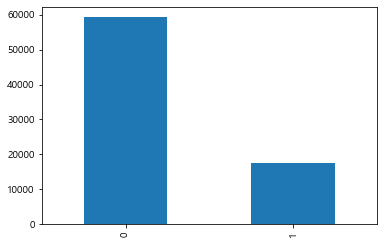

In [6]:
#data['우범여부'].value_counts()
data['우범여부'].value_counts().plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

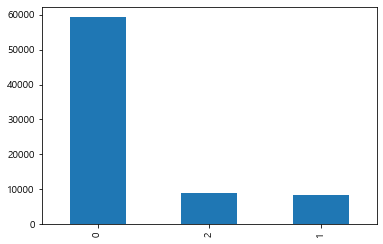

In [7]:
#data['핵심적발'].value_counts()
data['핵심적발'].value_counts().plot(kind='bar')
plt.show

## 신고일자

In [3]:
date = data.loc[:, ['신고일자', '우범여부']]
date.info()

NameError: name 'data' is not defined

In [9]:
date['신고일자'] = pd.to_datetime(date['신고일자'])
date['month'] = date['신고일자'].dt.month
date['day'] = date['신고일자'].dt.day

date

신고일자  우범여부  month  day
0     2020-01-01     1      1    1
1     2020-01-01     0      1    1
2     2020-01-01     0      1    1
3     2020-01-01     0      1    1
4     2020-01-01     1      1    1
...          ...   ...    ...  ...
76832 2020-09-30     0      9   30
76833 2020-09-30     1      9   30
76834 2020-09-30     0      9   30
76835 2020-09-30     1      9   30
76836 2020-09-30     1      9   30

[76837 rows x 4 columns]

In [10]:
a = np.zeros(12)

for i, j in zip(date['month'], date['우범여부']):
    if j == 1:
        a[i-1] += 1
        
print(a)

[2203. 2020. 2093. 1908. 1835. 1885. 2027. 1794. 1807.    0.    0.    0.]


## 신고인번호

In [11]:
number = data.loc[:, ['신고번호','우범여부']]
number['신고번호'] /= 1000000
number['신고번호'] = number['신고번호'].astype(int)
number

신고번호  우범여부
0        57     1
1        85     0
2        63     0
3        40     0
4        11     1
...     ...   ...
76832    94     0
76833    17     1
76834    26     0
76835    48     1
76836    81     1

[76837 rows x 2 columns]

In [12]:
b = np.zeros(100)
c = np.zeros(100)

for num, ox in zip(number['신고번호'], number['우범여부']):
    if ox == 1:
        b[num-10] += 1
        
for num in number['신고번호']:
    c[num-10] += 1

print(b)
print(c)

c = c/b

print(c)

[205. 177. 187. 201. 174. 182. 180. 186. 194. 201. 205. 200. 197. 189.
 177. 181. 181. 206. 205. 224. 166. 215. 203. 194. 186. 179. 164. 195.
 196. 198. 203. 214. 190. 206. 173. 180. 210. 218. 193. 164. 188. 188.
 173. 210. 188. 212. 208. 214. 196. 203. 180. 212. 215. 225. 212. 187.
 218. 214. 208. 188. 205. 183. 216. 198. 204. 189. 191. 196. 197. 200.
 192. 191. 197. 192. 184. 187. 186. 173. 201. 178. 192. 180. 214. 193.
 199. 188. 200. 216. 200. 192.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]
[861. 804. 884. 850. 840. 864. 813. 836. 857. 852. 883. 850. 821. 825.
 835. 855. 874. 874. 849. 890. 809. 911. 864. 870. 857. 874. 780. 885.
 909. 859. 867. 897. 884. 886. 874. 887. 844. 885. 876. 814. 865. 868.
 824. 802. 818. 837. 879. 835. 861. 842. 853. 869. 857. 887. 887. 796.
 894. 874. 814. 879. 875. 771. 878. 921. 840. 820. 819. 857. 828. 850.
 878. 870. 878. 860. 825. 851. 883. 816. 882. 863. 818. 851. 860. 831.
 845. 817. 858. 874. 792. 836.   0.   0.   0.   0.   0.   0.   0.

C:\Users\gpdus\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
mydata = data.iloc[:, 0:10]
mydata

신고번호        신고일자  통관지세관부호  신고인부호    수입자부호  해외거래처부호  특송업체부호  \
0      57298928  2020-01-01      121  2O5A2  82ZHWNL      NaN  TQ18AK   
1      85092852  2020-01-01       30  305K5  5IS70LE      NaN     NaN   
2      63014158  2020-01-01       20  CGMT6  GJ5KBL3  R9ZQOG7     NaN   
3      40175917  2020-01-01       40  QWUTG  PBYW02T      NaN     NaN   
4      11602631  2020-01-01       30  0X1CO  MCX0GJB  4Z9PX0Y     NaN   
...         ...         ...      ...    ...      ...      ...     ...   
76832  94508764  2020-09-30       40  3A8I7  BECE6R3  FYZA0QQ     NaN   
76833  17853106  2020-09-30       40  QK03W  2WEWINH  QUM8VZX     NaN   
76834  26558010  2020-09-30       40  S86Q6  GIWBVU7  PHNRCZY     NaN   
76835  48138979  2020-09-30       40  OGZCI  N3UTDBA  8DJ0WHZ  ID7FLR   
76836  81391181  2020-09-30       40  CGMT6  LIPZTZ4  ZLF7Q7N  QJ0YGH   

      수입통관계획코드 수입신고구분코드  수입거래구분코드  
0            D        B        15  
1            C        B        11  
2            D        B        11  
3            C        B        94  
4            C        B        11  
...        ...      ...       ...  
76832        C        D        11  
76833        B        B        91  
76834        D        B        91  
76835        D        B        87  
76836        D        B        15  

[76837 rows x 10 columns]

In [14]:
mydata['우범여부'] = data['우범여부']
mydata

신고번호        신고일자  통관지세관부호  신고인부호    수입자부호  해외거래처부호  특송업체부호  \
0      57298928  2020-01-01      121  2O5A2  82ZHWNL      NaN  TQ18AK   
1      85092852  2020-01-01       30  305K5  5IS70LE      NaN     NaN   
2      63014158  2020-01-01       20  CGMT6  GJ5KBL3  R9ZQOG7     NaN   
3      40175917  2020-01-01       40  QWUTG  PBYW02T      NaN     NaN   
4      11602631  2020-01-01       30  0X1CO  MCX0GJB  4Z9PX0Y     NaN   
...         ...         ...      ...    ...      ...      ...     ...   
76832  94508764  2020-09-30       40  3A8I7  BECE6R3  FYZA0QQ     NaN   
76833  17853106  2020-09-30       40  QK03W  2WEWINH  QUM8VZX     NaN   
76834  26558010  2020-09-30       40  S86Q6  GIWBVU7  PHNRCZY     NaN   
76835  48138979  2020-09-30       40  OGZCI  N3UTDBA  8DJ0WHZ  ID7FLR   
76836  81391181  2020-09-30       40  CGMT6  LIPZTZ4  ZLF7Q7N  QJ0YGH   

      수입통관계획코드 수입신고구분코드  수입거래구분코드  우범여부  
0            D        B        15     1  
1            C        B        11     0  
2            D        B        11     0  
3            C        B        94     0  
4            C        B        11     1  
...        ...      ...       ...   ...  
76832        C        D        11     0  
76833        B        B        91     1  
76834        D        B        91     0  
76835        D        B        87     1  
76836        D        B        15     1  

[76837 rows x 11 columns]

In [15]:
number['신고번호_뒷자리'] = data.loc[:,['신고번호']]
number['신고번호_뒷자리'] %= 100
number.sample(5)

신고번호  우범여부  신고번호_뒷자리
5858     62     0        43
7130     54     0        63
12919    80     0        37
71066    32     0        47
29917    95     0        96

In [16]:
rear = np.zeros(100)
rear_all = np.zeros(100)

for num, ox in zip(number['신고번호_뒷자리'], number['우범여부']):
    if ox == 1:
        rear[num-10] += 1
        
for num in number['신고번호_뒷자리']:
    rear_all[num-10] += 1
    
print(rear)
print(rear_all)

rear_all /= rear
print(rear_all)

[181. 161. 158. 171. 210. 165. 185. 173. 174. 196. 179. 167. 186. 177.
 168. 155. 161. 190. 176. 168. 169. 178. 186. 174. 169. 167. 188. 165.
 199. 181. 187. 168. 165. 161. 192. 187. 173. 187. 166. 175. 196. 159.
 176. 183. 166. 180. 182. 166. 197. 192. 164. 172. 202. 175. 179. 188.
 188. 166. 183. 155. 164. 193. 180. 171. 179. 186. 183. 176. 184. 182.
 163. 171. 181. 186. 166. 183. 174. 170. 177. 182. 185. 175. 173. 164.
 166. 182. 168. 163. 183. 178. 143. 163. 159. 177. 157. 193. 161. 186.
 191. 147.]
[768. 751. 726. 752. 789. 758. 763. 789. 780. 787. 739. 695. 747. 741.
 804. 722. 732. 801. 801. 700. 818. 795. 778. 760. 754. 793. 793. 742.
 812. 731. 790. 771. 805. 723. 782. 823. 758. 768. 754. 787. 788. 786.
 768. 773. 767. 772. 771. 805. 775. 751. 769. 758. 786. 783. 715. 807.
 765. 761. 793. 748. 748. 822. 754. 771. 762. 769. 752. 797. 784. 778.
 786. 746. 752. 790. 760. 777. 761. 767. 775. 797. 797. 786. 747. 754.
 771. 782. 750. 726. 762. 776. 739. 734. 754. 807. 816. 795. 679.

## 통관지세관번호

In [17]:
customs=data[['통관지세관부호', '우범여부']]
customs
custom = customs.groupby('통관지세관부호').sum()
custom

우범여부
통관지세관부호      
10        774
12        100
13        727
14         44
16       1207
17         28
20       2980
21        144
23         29
30       2491
33        290
39        150
40       6944
41        115
50         59
53         97
56         52
60         14
62        128
70         11
71         14
80        165
81         39
82         86
90         35
100        31
101        12
102        32
110        12
120        90
121        86
122        55
130        59
131        94
140       108
150        72
151        81
152        68
153        40
154         9

In [18]:
count_custom = data['통관지세관부호'].value_counts()
pd.set_option('display.max_rows', 3000)
count_custom = pd.DataFrame(count_custom)
count_custom = count_custom.reset_index()
count_custom = count_custom.rename(columns={'index':'통관지세관부호','통관지세관부호':'중복'})
count_custom

통관지세관부호     중복
0        40  39007
1        20  12354
2        30   9050
3        10   6578
4        16   3698
5        13   1834
6        33    636
7        80    298
8        39    252
9        62    233
10       21    230
11       41    215
12       12    209
13      140    187
14       53    163
15       82    148
16      120    146
17      131    145
18      121    137
19      151    127
20      152    119
21      150    105
22      130     98
23       50     98
24      122     88
25       56     85
26      153     81
27       14     79
28       81     63
29       90     61
30       23     51
31      100     47
32       17     46
33      102     45
34       71     29
35       70     24
36       60     21
37      110     19
38      101     17
39      154     14

In [19]:
customcode=pd.merge(count_custom,custom, how='left', on='통관지세관부호')
customcode['비율'] = customcode['우범여부'] / customcode['중복']
customcode = customcode.sort_values(by='비율', ascending = False)
customcode

통관지세관부호     중복  우범여부        비율
33      102     45    32  0.711111
38      101     17    12  0.705882
21      150    105    72  0.685714
36       60     21    14  0.666667
31      100     47    31  0.659574
17      131    145    94  0.648276
39      154     14     9  0.642857
19      151    127    81  0.637795
37      110     19    12  0.631579
18      121    137    86  0.627737
10       21    230   144  0.626087
24      122     88    55  0.625000
28       81     63    39  0.619048
16      120    146    90  0.616438
25       56     85    52  0.611765
32       17     46    28  0.608696
23       50     98    59  0.602041
22      130     98    59  0.602041
8        39    252   150  0.595238
14       53    163    97  0.595092
15       82    148    86  0.581081
13      140    187   108  0.577540
29       90     61    35  0.573770
20      152    119    68  0.571429
30       23     51    29  0.568627
27       14     79    44  0.556962
7        80    298   165  0.553691
9        62    233   128  0.549356
11       41    215   115  0.534884
26      153     81    40  0.493827
34       71     29    14  0.482759
12       12    209   100  0.478469
35       70     24    11  0.458333
6        33    636   290  0.455975
5        13   1834   727  0.396401
4        16   3698  1207  0.326393
2        30   9050  2491  0.275249
1        20  12354  2980  0.241217
0        40  39007  6944  0.178019
3        10   6578   774  0.117665

In [20]:
customcode=pd.merge(count_custom,custom, how='left', on='통관지세관부호')
customcode['비율'] = customcode['우범여부'] / customcode['중복']
customcode = customcode.sort_values(by='중복', ascending = False)
customcode

통관지세관부호     중복  우범여부        비율
0        40  39007  6944  0.178019
1        20  12354  2980  0.241217
2        30   9050  2491  0.275249
3        10   6578   774  0.117665
4        16   3698  1207  0.326393
5        13   1834   727  0.396401
6        33    636   290  0.455975
7        80    298   165  0.553691
8        39    252   150  0.595238
9        62    233   128  0.549356
10       21    230   144  0.626087
11       41    215   115  0.534884
12       12    209   100  0.478469
13      140    187   108  0.577540
14       53    163    97  0.595092
15       82    148    86  0.581081
16      120    146    90  0.616438
17      131    145    94  0.648276
18      121    137    86  0.627737
19      151    127    81  0.637795
20      152    119    68  0.571429
21      150    105    72  0.685714
22      130     98    59  0.602041
23       50     98    59  0.602041
24      122     88    55  0.625000
25       56     85    52  0.611765
26      153     81    40  0.493827
27       14     79    44  0.556962
28       81     63    39  0.619048
29       90     61    35  0.573770
30       23     51    29  0.568627
31      100     47    31  0.659574
32       17     46    28  0.608696
33      102     45    32  0.711111
34       71     29    14  0.482759
35       70     24    11  0.458333
36       60     21    14  0.666667
37      110     19    12  0.631579
38      101     17    12  0.705882
39      154     14     9  0.642857

## 수입통관계획코드

In [21]:
plan_code = mydata.loc[:,['수입통관계획코드', '우범여부']]
plan_code
plan_code_arr = np.zeros(9)
for i in plan_code.index:
    val = plan_code.loc[i,'수입통관계획코드']
    if val == 'A':
        plan_code_arr[0] += 1
    elif val == 'B':
        plan_code_arr[1] += 1
    elif val == 'C':
        plan_code_arr[2] += 1
    elif val == 'D':
        plan_code_arr[3] += 1
    elif val == 'E':
        plan_code_arr[4] += 1
    elif val == 'F':
        plan_code_arr[5] += 1
    elif val == 'G':
        plan_code_arr[6] += 1
    elif val == 'H':
        plan_code_arr[7] += 1
    elif val == 'Z':
        plan_code_arr[8] += 1

print(plan_code_arr)

[    0.  5973. 27421. 27814.  5468.  8273.     0.   229.  1659.]


In [22]:
plan_code['A~Z'] = pd.DataFrame(plan_code_arr)
plan_code

수입통관계획코드  우범여부      A~Z
0            D     1      0.0
1            C     0   5973.0
2            D     0  27421.0
3            C     0  27814.0
4            C     1   5468.0
...        ...   ...      ...
76832        C     0      NaN
76833        B     1      NaN
76834        D     0      NaN
76835        D     1      NaN
76836        D     1      NaN

[76837 rows x 3 columns]

In [23]:
plan_code_crime = np.zeros(9)
for i in plan_code.index:
    val = plan_code.loc[i,'수입통관계획코드']
    iscrime = plan_code.loc[i,'우범여부']
    if val == 'A' and iscrime == 1:
        plan_code_crime[0] += 1
    elif val == 'B' and iscrime == 1:
        plan_code_crime[1] += 1
    elif val == 'C' and iscrime == 1:
        plan_code_crime[2] += 1
    elif val == 'D' and iscrime == 1:
        plan_code_crime[3] += 1
    elif val == 'E' and iscrime == 1:
        plan_code_crime[4] += 1
    elif val == 'F' and iscrime == 1:
        plan_code_crime[5] += 1
    elif val == 'G' and iscrime == 1:
        plan_code_crime[6] += 1
    elif val == 'H' and iscrime == 1:
        plan_code_crime[7] += 1
    elif val == 'Z' and iscrime == 1:
        plan_code_crime[8] += 1
print(plan_code_crime)

[   0.  903. 5714. 5678. 1826. 2522.    0.  153.  776.]


In [24]:
plan_code['A~Z_우범여부'] = pd.DataFrame(plan_code_crime)
plan_code = plan_code.dropna()
plan_code = plan_code.drop(['수입통관계획코드', '우범여부'], axis = 1)
plan_code

A~Z  A~Z_우범여부
0      0.0       0.0
1   5973.0     903.0
2  27421.0    5714.0
3  27814.0    5678.0
4   5468.0    1826.0
5   8273.0    2522.0
6      0.0       0.0
7    229.0     153.0
8   1659.0     776.0

In [25]:
plan_code['우범률'] = plan_code['A~Z_우범여부']/plan_code['A~Z']
plan_code

A~Z  A~Z_우범여부       우범률
0      0.0       0.0       NaN
1   5973.0     903.0  0.151180
2  27421.0    5714.0  0.208380
3  27814.0    5678.0  0.204142
4   5468.0    1826.0  0.333943
5   8273.0    2522.0  0.304847
6      0.0       0.0       NaN
7    229.0     153.0  0.668122
8   1659.0     776.0  0.467752

In [26]:
plan_code = plan_code.rename(index={0: 'A', 1:'B', 2:'C',
                                         3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'Z'})
plan_code

A~Z  A~Z_우범여부       우범률
A      0.0       0.0       NaN
B   5973.0     903.0  0.151180
C  27421.0    5714.0  0.208380
D  27814.0    5678.0  0.204142
E   5468.0    1826.0  0.333943
F   8273.0    2522.0  0.304847
G      0.0       0.0       NaN
H    229.0     153.0  0.668122
Z   1659.0     776.0  0.467752

## 수입신고

In [27]:
import_declaration_code = mydata.loc[:, ['수입신고구분코드', '우범여부']]
import_declaration_code
imdec_arr = np.zeros(7)
for i in import_declaration_code.index:
    code = import_declaration_code.loc[i,'수입신고구분코드']
    if code == 'A':
        imdec_arr[0] += 1
    elif code == 'B':
        imdec_arr[1] += 1
    elif code == 'C':
        imdec_arr[2] += 1
    elif code == 'D':
        imdec_arr[3] += 1
    elif code == 'E':
        imdec_arr[4] += 1
    elif code == 'F':
        imdec_arr[5] += 1
    elif code == 'G':
        imdec_arr[6] += 1
print(imdec_arr)

[  844. 72345.     0.  2075.  1573.     0.     0.]


In [28]:
import_declaration_code['코드개수'] = pd.DataFrame(imdec_arr)
import_declaration_code

수입신고구분코드  우범여부     코드개수
0            B     1    844.0
1            B     0  72345.0
2            B     0      0.0
3            B     0   2075.0
4            B     1   1573.0
...        ...   ...      ...
76832        D     0      NaN
76833        B     1      NaN
76834        B     0      NaN
76835        B     1      NaN
76836        B     1      NaN

[76837 rows x 3 columns]

In [29]:
imdec_crime = np.zeros(9)
for i in import_declaration_code.index:
    val = import_declaration_code.loc[i,'수입신고구분코드']
    iscrime = import_declaration_code.loc[i,'우범여부']
    if val == 'A' and iscrime == 1:
        imdec_crime[0] += 1
    elif val == 'B' and iscrime == 1:
        imdec_crime[1] += 1
    elif val == 'C' and iscrime == 1:
        imdec_crime[2] += 1
    elif val == 'D' and iscrime == 1:
        imdec_crime[3] += 1
    elif val == 'E' and iscrime == 1:
        imdec_crime[4] += 1
    elif val == 'F' and iscrime == 1:
        imdec_crime[5] += 1
    elif val == 'G' and iscrime == 1:
        imdec_crime[6] += 1
        
import_declaration_code['우범횟수'] = pd.DataFrame(imdec_crime)
import_declaration_code

수입신고구분코드  우범여부     코드개수     우범횟수
0            B     1    844.0    131.0
1            B     0  72345.0  15616.0
2            B     0      0.0      0.0
3            B     0   2075.0   1038.0
4            B     1   1573.0    787.0
...        ...   ...      ...      ...
76832        D     0      NaN      NaN
76833        B     1      NaN      NaN
76834        B     0      NaN      NaN
76835        B     1      NaN      NaN
76836        B     1      NaN      NaN

[76837 rows x 4 columns]

In [30]:
import_declaration_code = import_declaration_code.dropna()
import_declaration_code = import_declaration_code.drop(['수입신고구분코드', '우범여부'], axis = 1)
import_declaration_code

코드개수     우범횟수
0    844.0    131.0
1  72345.0  15616.0
2      0.0      0.0
3   2075.0   1038.0
4   1573.0    787.0
5      0.0      0.0
6      0.0      0.0

In [31]:
import_declaration_code['우범률'] = import_declaration_code['우범횟수'] / import_declaration_code['코드개수']
import_declaration_code

코드개수     우범횟수       우범률
0    844.0    131.0  0.155213
1  72345.0  15616.0  0.215855
2      0.0      0.0       NaN
3   2075.0   1038.0  0.500241
4   1573.0    787.0  0.500318
5      0.0      0.0       NaN
6      0.0      0.0       NaN

In [32]:
# 수입신고구분코드
import_declaration_code = import_declaration_code.rename(index={0: 'A', 1:'B', 2:'C',
                                         3:'D', 4:'E', 5:'F', 6:'G'})
import_declaration_code

코드개수     우범횟수       우범률
A    844.0    131.0  0.155213
B  72345.0  15616.0  0.215855
C      0.0      0.0       NaN
D   2075.0   1038.0  0.500241
E   1573.0    787.0  0.500318
F      0.0      0.0       NaN
G      0.0      0.0       NaN

## 수입거래구분코드

In [33]:
deal=data[['수입거래구분코드', '우범여부']]
deal
deals = deal.groupby('수입거래구분코드').sum()
deals

우범여부
수입거래구분코드      
11        7045
12          24
13          46
15        5029
21          30
22          47
29         119
51          31
52          32
55          15
59          26
71          48
80          56
83         126
84         163
85          97
86          59
87        1331
88         138
89         203
91        1068
92          67
93         127
94        1521
96         124

In [34]:
count_deal = data['수입거래구분코드'].value_counts()
pd.set_option('display.max_rows', 3000)
count_deal = pd.DataFrame(count_deal)
count_deal = count_deal.reset_index()
count_deal = count_deal.rename(columns={'index':'수입거래구분코드','수입거래구분코드':'중복'})
count_deal

수입거래구분코드     중복
0         11  41734
1         15  21667
2         94   4174
3         87   3555
4         91   3071
5         89    343
6         84    252
7         29    228
8         93    224
9         88    223
10        96    213
11        83    204
12        85    174
13        92    110
14        86    105
15        80    104
16        71     77
17        22     69
18        13     64
19        51     49
20        52     44
21        21     41
22        59     41
23        12     39
24        55     32

In [35]:
dealcode=pd.merge(count_deal,deals, how='left', on='수입거래구분코드')
dealcode['비율'] = dealcode['우범여부'] / dealcode['중복']
dealcode = dealcode.sort_values(by='비율', ascending = False)
dealcode

수입거래구분코드     중복  우범여부        비율
21        21     41    30  0.731707
20        52     44    32  0.727273
18        13     64    46  0.718750
17        22     69    47  0.681159
6         84    252   163  0.646825
22        59     41    26  0.634146
19        51     49    31  0.632653
16        71     77    48  0.623377
9         88    223   138  0.618834
11        83    204   126  0.617647
23        12     39    24  0.615385
13        92    110    67  0.609091
5         89    343   203  0.591837
10        96    213   124  0.582160
8         93    224   127  0.566964
14        86    105    59  0.561905
12        85    174    97  0.557471
15        80    104    56  0.538462
7         29    228   119  0.521930
24        55     32    15  0.468750
3         87   3555  1331  0.374402
2         94   4174  1521  0.364399
4         91   3071  1068  0.347769
1         15  21667  5029  0.232104
0         11  41734  7045  0.168807

## 특송업체

In [36]:
companys=data[['특송업체부호', '우범여부']]
companys
company = companys.groupby('특송업체부호').sum()
company

우범여부
특송업체부호      
1A3HEJ    41
1E2DJD    30
1EZAFG    24
24BG4R   440
26O9QU   137
2ADDNP   181
47QGIA    30
5FDIRV    10
5HIQAV    18
5SZ7FO   169
6AXUNR   175
6EM00W   125
6FE43Q    21
6MSSDI    89
6RJ8HT   241
6TFEP5   255
6VXR7R   136
718MAA   226
883CMC   127
8Q2G59    38
8Z7M3O   140
90DF54   106
98GCBT    75
9BO2S9    49
A41WVG    22
A9QWI8   101
AMGRF5    62
BLQXV7    41
C54WLZ   145
CRVF1Z    23
D3H0A4   107
FJ0YAA    27
FK5XHP    70
HB62YN    74
HGT4IX   155
HN5E27   146
HRIQ4G    33
I8ST7N    29
ID1L6P    11
ID7FLR   247
K35446   135
KMQGJQ    31
KTBTZT   113
L0ZLXK    30
L2ILSN   112
L67RFP   112
M72HED    10
M7SEXF    61
ME9TG4   122
MRD73X    34
MWL4TG    11
NBYTNK    70
O04TIW   365
O2J0OX    54
OJ6WM3   177
PAVJZL   758
PNE6WR    13
PR5UFJ  1385
PZYUR4    91
Q03ZS4    84
Q8TBEO   119
QJ0YGH   284
QKUSM1   183
QP5OME    62
QSV8RY   111
RDEAWL   106
RG7BYC    37
RKP5AP    49
TOO0OK   179
TQ18AK   389
VACAWV   402
VI9G4M   124
VSYNVB   116
WDVVLL    26
XIKL72   106
XK2HKR   132
YBNP69    81
YGHZ0X    33
YXAKR4    64
ZVCGS6    53

In [37]:
count_company = data['특송업체부호'].value_counts()
pd.set_option('display.max_rows', 3000)
count_company = pd.DataFrame(count_company)
count_company = count_company.reset_index()
count_company = count_company.rename(columns={'index':'특송업체부호','특송업체부호':'중복'})
count_company

특송업체부호    중복
0   PR5UFJ  5030
1   PAVJZL  2798
2   24BG4R  1209
3   TQ18AK  1131
4   O04TIW  1054
5   VACAWV   956
6   QJ0YGH   647
7   6TFEP5   593
8   6RJ8HT   527
9   718MAA   478
10  ID7FLR   456
11  QKUSM1   364
12  2ADDNP   344
13  5SZ7FO   343
14  OJ6WM3   342
15  TOO0OK   335
16  6AXUNR   300
17  8Z7M3O   293
18  HGT4IX   284
19  26O9QU   284
20  C54WLZ   272
21  6VXR7R   254
22  883CMC   251
23  K35446   249
24  HN5E27   248
25  VI9G4M   248
26  VSYNVB   245
27  XK2HKR   232
28  Q8TBEO   220
29  ME9TG4   215
30  6EM00W   211
31  D3H0A4   211
32  KTBTZT   207
33  QSV8RY   207
34  RDEAWL   199
35  L67RFP   194
36  XIKL72   191
37  90DF54   184
38  A9QWI8   180
39  L2ILSN   170
40  PZYUR4   161
41  6MSSDI   153
42  Q03ZS4   151
43  YBNP69   146
44  NBYTNK   136
45  98GCBT   125
46  HB62YN   124
47  FK5XHP   124
48  QP5OME   123
49  AMGRF5   114
50  M7SEXF   109
51  YXAKR4   104
52  O2J0OX    91
53  RKP5AP    78
54  9BO2S9    78
55  ZVCGS6    77
56  KMQGJQ    68
57  1A3HEJ    68
58  RG7BYC    66
59  8Q2G59    66
60  BLQXV7    64
61  1E2DJD    58
62  MRD73X    54
63  FJ0YAA    52
64  L0ZLXK    51
65  HRIQ4G    51
66  YGHZ0X    50
67  I8ST7N    46
68  47QGIA    45
69  WDVVLL    43
70  CRVF1Z    41
71  1EZAFG    41
72  6FE43Q    37
73  A41WVG    31
74  5HIQAV    27
75  PNE6WR    25
76  ID1L6P    22
77  M72HED    19
78  MWL4TG    17
79  5FDIRV    14

In [38]:
companycode=pd.merge(count_company,company, how='left', on='특송업체부호')
companycode['비율'] = companycode['우범여부'] / companycode['중복']
companycode = companycode.sort_values(by='비율', ascending = False)
companycode

특송업체부호    중복  우범여부        비율
79  5FDIRV    14    10  0.714286
73  A41WVG    31    22  0.709677
55  ZVCGS6    77    53  0.688312
74  5HIQAV    27    18  0.666667
68  47QGIA    45    30  0.666667
66  YGHZ0X    50    33  0.660000
39  L2ILSN   170   112  0.658824
78  MWL4TG    17    11  0.647059
65  HRIQ4G    51    33  0.647059
60  BLQXV7    64    41  0.640625
67  I8ST7N    46    29  0.630435
62  MRD73X    54    34  0.629630
54  9BO2S9    78    49  0.628205
53  RKP5AP    78    49  0.628205
51  YXAKR4   104    64  0.615385
69  WDVVLL    43    26  0.604651
57  1A3HEJ    68    41  0.602941
45  98GCBT   125    75  0.600000
46  HB62YN   124    74  0.596774
52  O2J0OX    91    54  0.593407
30  6EM00W   211   125  0.592417
24  HN5E27   248   146  0.588710
64  L0ZLXK    51    30  0.588235
71  1EZAFG    41    24  0.585366
16  6AXUNR   300   175  0.583333
41  6MSSDI   153    89  0.581699
35  L67RFP   194   112  0.577320
37  90DF54   184   106  0.576087
59  8Q2G59    66    38  0.575758
27  XK2HKR   232   132  0.568966
72  6FE43Q    37    21  0.567568
29  ME9TG4   215   122  0.567442
40  PZYUR4   161    91  0.565217
47  FK5XHP   124    70  0.564516
38  A9QWI8   180   101  0.561111
70  CRVF1Z    41    23  0.560976
58  RG7BYC    66    37  0.560606
50  M7SEXF   109    61  0.559633
42  Q03ZS4   151    84  0.556291
36  XIKL72   191   106  0.554974
43  YBNP69   146    81  0.554795
32  KTBTZT   207   113  0.545894
18  HGT4IX   284   155  0.545775
49  AMGRF5   114    62  0.543860
23  K35446   249   135  0.542169
10  ID7FLR   456   247  0.541667
28  Q8TBEO   220   119  0.540909
33  QSV8RY   207   111  0.536232
21  6VXR7R   254   136  0.535433
15  TOO0OK   335   179  0.534328
20  C54WLZ   272   145  0.533088
34  RDEAWL   199   106  0.532663
77  M72HED    19    10  0.526316
12  2ADDNP   344   181  0.526163
75  PNE6WR    25    13  0.520000
63  FJ0YAA    52    27  0.519231
14  OJ6WM3   342   177  0.517544
61  1E2DJD    58    30  0.517241
44  NBYTNK   136    70  0.514706
31  D3H0A4   211   107  0.507109
22  883CMC   251   127  0.505976
48  QP5OME   123    62  0.504065
11  QKUSM1   364   183  0.502747
25  VI9G4M   248   124  0.500000
76  ID1L6P    22    11  0.500000
13  5SZ7FO   343   169  0.492711
19  26O9QU   284   137  0.482394
17  8Z7M3O   293   140  0.477816
26  VSYNVB   245   116  0.473469
9   718MAA   478   226  0.472803
8   6RJ8HT   527   241  0.457306
56  KMQGJQ    68    31  0.455882
6   QJ0YGH   647   284  0.438949
7   6TFEP5   593   255  0.430017
5   VACAWV   956   402  0.420502
2   24BG4R  1209   440  0.363937
4   O04TIW  1054   365  0.346300
3   TQ18AK  1131   389  0.343943
0   PR5UFJ  5030  1385  0.275348
1   PAVJZL  2798   758  0.270908

## 해외거래처

In [39]:
foreigns=data[['해외거래처부호', '우범여부']]
foreign = foreigns.groupby('해외거래처부호').sum()
foreign

우범여부
해외거래처부호      
00CBPDA     2
00L6IOV     3
00ME96E    22
010NCL1     5
01D4WB5     1
...       ...
ZZF0ICF     5
ZZF0WV9     0
ZZP3RMM     1
ZZVI3K5     3
ZZVYL8U     3

[4748 rows x 1 columns]

In [40]:
count_foreign = data['해외거래처부호'].value_counts()
pd.set_option('display.max_rows', 3000)
count_foreign = pd.DataFrame(count_foreign)
count_foreign = count_foreign.reset_index()
count_foreign = count_foreign.rename(columns={'index':'해외거래처부호','해외거래처부호':'중복'})
count_foreign

해외거래처부호   중복
0     WQZVLM0  517
1     R0XT3H9  360
2     MW8PLZN  359
3     VQJ47O3  327
4     ANYU5CE  311
...       ...  ...
4743  64RO29H    1
4744  IZ4MFFO    1
4745  9CLR120    1
4746  ZAHK5Q9    1
4747  AZP8TUR    1

[4748 rows x 2 columns]

In [41]:
foreigncode=pd.merge(count_foreign,foreigns, how='left', on='해외거래처부호')
foreigncode['비율'] = foreigncode['우범여부'] / foreigncode['중복']
foreigncode = foreigncode.sort_values(by='비율', ascending = False)
foreigncode

해외거래처부호  중복  우범여부   비율
50543  AZP8TUR   1     1  1.0
50295  YDTM3ZS   1     1  1.0
50431  2Z7BT2T   1     1  1.0
50429  J5ACXLO   1     1  1.0
50290  925H010   1     1  1.0
...        ...  ..   ...  ...
18721  AN2B64Y  23     0  0.0
18723  AN2B64Y  23     0  0.0
18726  AN2B64Y  23     0  0.0
18727  AN2B64Y  23     0  0.0
25272  2MWT72G  14     0  0.0

[50544 rows x 4 columns]

## 징수형태

In [42]:
collects=data[['징수형태코드', '우범여부']]
collects
collect = collects.groupby('징수형태코드').sum()
collect

우범여부
징수형태코드      
0        372
11      9316
12        31
13       132
14      1480
18      2149
21      1255
33        59
43      2778

In [43]:
count_collect = data['징수형태코드'].value_counts()
pd.set_option('display.max_rows', 3000)
count_collect = pd.DataFrame(count_collect)
count_collect = count_collect.reset_index()
count_collect = count_collect.rename(columns={'index':'징수형태코드','징수형태코드':'중복'})
count_collect

징수형태코드     중복
0      11  51307
1      43   9193
2      18   6490
3      14   3903
4      21   3055
5       0   2497
6      13    250
7      33     89
8      12     53

In [44]:
collectcode=pd.merge(count_collect,collect, how='left', on='징수형태코드')
collectcode['비율'] = collectcode['우범여부'] / collectcode['중복']
collectcode = collectcode.sort_values(by='비율', ascending = False)
collectcode

징수형태코드     중복  우범여부        비율
7      33     89    59  0.662921
8      12     53    31  0.584906
6      13    250   132  0.528000
4      21   3055  1255  0.410802
3      14   3903  1480  0.379195
2      18   6490  2149  0.331125
1      43   9193  2778  0.302186
0      11  51307  9316  0.181574
5       0   2497   372  0.148979

## 운송수단

In [45]:
trans=data[['운송수단유형코드', '우범여부']]
trans

운송수단유형코드  우범여부
0            10     1
1            40     0
2            40     0
3            40     0
4            40     1
...         ...   ...
76832        10     0
76833        10     1
76834        40     0
76835        50     1
76836        40     1

[76837 rows x 2 columns]

In [46]:
tran = trans.groupby('운송수단유형코드').sum()
tran

우범여부
운송수단유형코드      
10        6960
20         112
30         580
40        8692
50        1125
90         103

In [47]:
count_tran = data['운송수단유형코드'].value_counts()
pd.set_option('display.max_rows', 3000)
count_tran = pd.DataFrame(count_tran)
count_tran = count_tran.reset_index()
count_tran = count_tran.rename(columns={'index':'운송수단유형코드','운송수단유형코드':'중복'})
count_tran

운송수단유형코드     중복
0        40  37086
1        10  35895
2        50   2346
3        30   1172
4        20    178
5        90    160

In [48]:
transcode=pd.merge(count_tran,tran, how='left', on='운송수단유형코드')
transcode['비율'] = transcode['우범여부'] / transcode['중복']
transcode = transcode.sort_values(by='비율', ascending = False)
transcode

운송수단유형코드     중복  우범여부        비율
5        90    160   103  0.643750
4        20    178   112  0.629213
3        30   1172   580  0.494881
2        50   2346  1125  0.479540
0        40  37086  8692  0.234374
1        10  35895  6960  0.193899

# 신고중량

In [49]:
weight=data[['신고중량(KG)', '우범여부']]
weight

신고중량(KG)  우범여부
0         126.0     1
1       29845.4     0
2       23557.5     0
3       12450.1     0
4       15692.7     1
...         ...   ...
76832    5386.6     0
76833    7536.0     1
76834    2657.8     0
76835    3753.6     1
76836    5680.3     1

[76837 rows x 2 columns]

In [50]:
df_org= pd.read_csv('train.csv', encoding='CP949')

In [51]:
#100 1000 10,000 100,000 
e = np.zeros(6)
for df_org, ox in zip(df_org['신고중량(KG)'], df_org['우범여부']):
    if df_org < 100:
        if ox == 1:
            e[0] += 1
    if df_org >= 100 and df_org < 1000:
        if ox == 1:
            e[1] += 1
    if df_org >= 1000 and df_org < 10000:
        if ox == 1:
            e[2] += 1
    if df_org >= 10000 and df_org < 100000:
        if ox == 1:
            e[3] += 1
    if df_org >= 100000 and df_org < 1000000:
        if ox == 1:
            e[4] += 1
    if df_org >= 1000000 and df_org < 10000000:
        if ox == 1:
            e[5] += 1
print(e)

[1077. 2794. 9550. 3965.  186.    0.]


In [52]:
df_org= pd.read_csv('train.csv', encoding='CP949')

In [53]:
#100 1000 10,000 100,000 
d = np.zeros(5)
for df_org, oxx in zip(df_org['신고중량(KG)'], df_org['핵심적발']):
    if df_org < 100:
        if oxx == 2:
            d[0] += 1
    if df_org >= 100 and df_org < 1000:
        if oxx == 2:
            d[1] += 1
    if df_org >= 1000 and df_org < 10000:
        if oxx == 2:
            d[2] += 1
    if df_org >= 10000 and df_org < 100000:
        if oxx == 2:
            d[3] += 1
    if df_org >= 100000 and df_org < 1000000:
        if oxx == 2:
            d[4] += 1
    if df_org >= 1000000 and df_org < 10000000:
        if oxx == 2:
            d[5] += 1
    if df_org >= 10000000 and df_org < 100000000:
        if oxx == 2:
            d[6] += 1
print(d)

[ 544. 1342. 5002. 2051.  110.]


## 과세가격원화금액

In [54]:
df_org= pd.read_csv('train.csv', encoding='CP949')

In [55]:
#10 100 1000 10,000 100,000 1,000,000 10,000,000 
f = np.zeros(12)
for df_org, ox in zip(df_org['과세가격원화금액'], df_org['우범여부']):
    if df_org < 10:
        if ox == 1:
            f[0] += 1
    if df_org >= 10 and df_org < 100:
        if ox == 1:
            f[1] += 1
    if df_org >= 100 and df_org < 1000:
        if ox == 1:
            f[2] += 1
    if df_org >= 1000 and df_org < 10000:
        if ox == 1:
            f[3] += 1
    if df_org >= 10000 and df_org < 100000:
        if ox == 1:
            f[4] += 1
    if df_org >= 100000 and df_org < 1000000:
        if ox == 1:
            f[5] += 1
    if df_org >= 1000000 and df_org < 10000000:
        if ox == 1:
            f[6] += 1
    if df_org >= 10000000 and df_org < 100000000:
        if ox == 1:
            f[7] += 1
    if df_org >= 100000000 and df_org < 1000000000:
        if ox == 1:
            f[8] += 1
    if df_org >= 1000000000 and df_org < 10000000000:
        if ox == 1:
            f[9] += 1
    if df_org >= 10000000000 and df_org < 100000000000:
        if ox == 1:
            f[10] += 1
    #이 이상 더 있을 수 있는데 숫자 많지 않아서 그냥 건너뜀
print(f)

[ 154.   70.  392. 1309. 3573. 5138. 4885. 1768.  219.   56.    6.    0.]


In [56]:
df_org= pd.read_csv('train.csv', encoding='CP949')

In [57]:
#10 100 1000 10,000 100,000 1,000,000 10,000,000 
g = np.zeros(12)
for df_org, oxx in zip(df_org['과세가격원화금액'], df_org['핵심적발']):
    if df_org < 10:
        if oxx == 2:
            g[0] += 1
    if df_org >= 10 and df_org < 100:
        if oxx == 2:
            g[1] += 1
    if df_org >= 100 and df_org < 1000:
        if oxx == 2:
            g[2] += 1
    if df_org >= 1000 and df_org < 10000:
        if oxx == 2:
            g[3] += 1
    if df_org >= 10000 and df_org < 100000:
        if oxx == 2:
            g[4] += 1
    if df_org >= 100000 and df_org < 1000000:
        if oxx == 2:
            g[5] += 1
    if df_org >= 1000000 and df_org < 10000000:
        if oxx == 2:
            g[6] += 1
    if df_org >= 10000000 and df_org < 100000000:
        if oxx == 2:
            g[7] += 1
    if df_org >= 100000000 and df_org < 1000000000:
        if oxx == 2:
            g[8] += 1
    if df_org >= 1000000000 and df_org < 10000000000:
        if oxx == 2:
            g[9] += 1
    if df_org >= 10000000000 and df_org < 100000000000:
        if oxx == 2:
            g[10] += 1
    #이 이상 더 있을 수 있는데 숫자 많지 않아서 그냥 건너뜀
print(g)

[  66.   33.  190.  630. 1820. 2674. 2564.  909.  126.   33.    3.    0.]


# HS10단위부호

In [58]:
data = pd.read_csv('train.csv', encoding='CP949')
mydata=data[['HS10단위부호', '우범여부']]
mydata

HS10단위부호  우범여부
0      8481900000     1
1      2106909099     0
2      6307909000     0
3      6505009090     0
4      6204320000     1
...           ...   ...
76832  8703241020     0
76833  9209999000     1
76834  3203001990     0
76835  1513199000     1
76836  8703241020     1

[76837 rows x 2 columns]

In [59]:
hs_x = mydata.groupby('HS10단위부호').sum()
hs_x

우범여부
HS10단위부호        
101299000      1
106191000      4
106199000      3
106203000      3
106209000      0
106903010      4
201201000      4
201300000      2
202300000      2
203299000     13
204220000      1
206100000      7
206291000      6
210190000      4
210209000      1
301119000      5
301190000      2
301921000      4
301929090     13
301997000      2
301999070      6
302140000      4
302550000      1
302820000      5
302899090      1
303130000      5
303230000      1
303390000      9
303530000      1
303550000      1
303591000      0
303592000      1
303599000      8
303650000      2
303670000      4
303810000      1
303822000      2
303892000      1
303895000      5
303899060      3
303899091     13
303899099      5
304750000      6
305321000      1
305593000      0
306169090      6
306171090      1
306179090      5
306320000      5
306959020      3
306959030      4
307210000      5
307432090     12
307511000      8
307521000      1
307523000      4
307719000      3
308901090      1
401501000      2
404901000      5
405100000      4
406101010      8
406101020      2
406200000      6
406300000      8
406902000      6
409000000     18
505100000      1
507901110     11
507901190      1
508002090      0
511912000      5
511999030      1
601209090      0
602109000      2
602901090      8
602909040      1
603199000      2
703101000     29
703209000      0
706101000     12
706901000      1
706904000      3
709200000      2
710802000     33
710804000      2
710806000      1
710807000     97
710809000      5
711905099      1
712901000      5
712902030      3
713321000      0
801110000      3
801320000      9
802120000      1
802320000      2
803900000      3
804300000      1
805100000      8
806100000      3
811902000      1
813200000      2
813500000      3
901110000      3
901210000     17
901220000      0
902100000      1
902200000      0
902300000      9
902400000      7
904210000      6
904220000      5
905100000      0
910111000     38
910919000      0
910991000      1
1004900000     2
1005901000     6
1008500000     1
1101001000     3
1103192000     4
1104120000     4
1106300000     3
1108191000     1
1109000000     0
1201903000     6
1202420000     1
1206000000     3
1207400000    10
1207500000     7
1207910000     1
1207991000     9
1208100000     0
1208900000     7
1209300000    11
1209919000     1
1209993000     4
1209999000     2
1211901600     4
1211901999    16
1211909090     4
1212212020     1
1212999000     1
1213000000     1
1214909011     5
1214909090     1
1302191120     3
1302191210     5
1302199039    10
1302199099    23
1404902010     4
1404909000     1
1503002000     0
1504309000     4
1508909000     1
1512191010     2
1513110000     2
1513199000     5
1513299000     1
1514110000     4
1514912000     0
1515909090     4
1516202040     1
1518002000     3
1601001000     5
1602329000     3
1602909000     1
1603003000     0
1604179000     5
1604199010     9
1604199090    11
1604204090     0
1604320000     2
1605542091     5
1605542099     4
1701130000     4
1701141000     1
1701142000     2
1701910000     0
1701990000     3
1702111000     1
1702201000     0
1702202000     6
1702301000     4
1702901000     8
1702909000     8
1704100000    14
1704902010     1
1704902090    63
1704909000    15
1801002000     1
1805000000    12
1806100000    10
1806201000    10
1806311000     5
1806319000     2
1806329000     2
1806901000    29
1806903010     1
1901101010    23
1901101090     2
1901109090     5
1901209000     5
1901902010     1
1901909099     1
1902191000     8
1902199000     3
1902200000     3
1902301010    15
1902301090    15
1902309000     8
1904109000     5
1904209000     1
1904901010    11
1904909000     7
1905310000     3
1905901040    48
1905901050     0
1905901090    35
1905909020     3
1905909090    50
2001909090     8
2004100000     2
2004909000     2
2005209000     1
2005400000     2
2005512000     0
2005800000     1
2005991000    21
2005999000    11
2006009090     1
2007100000     1
2007991000     6


In [60]:
count = mydata['HS10단위부호'].value_counts()
pd.set_option('display.max_rows', 3000)
count = pd.DataFrame(count)
#count = count.sort_values(by='적출국가코드', ascending=False)
count = count.reset_index()
count = count.rename(columns={'index':'HS10단위부호','HS10단위부호':'중복'})
count

HS10단위부호    중복
0     2106909099  4794
1     3926909000  2722
2     6307909000  1014
3     8703239020   749
4     3304999000   747
5     7326909000   633
6     3004909900   632
7     4202999000   591
8     6309000000   586
9      710807000   578
10    6211499000   572
11    3304991000   495
12    3924909000   420
13    2101111000   394
14    8543709090   393
15    9405409000   387
16    8703231020   377
17    9503003919   360
18    7602000000   357
19    8703241020   340
20    6404199000   329
21    3824999090   326
22    8708999000   325
23    6402999000   313
24    4202922000   311
25    6109101000   298
26    9401699000   290
27    7616999090   285
28    7204490000   283
29    4202921090   280
30    9506910000   279
31    9404900000   273
32    1704902090   270
33    9503003990   263
34    4202299000   253
35    4202211090   251
36    7117199000   245
37     710802000   245
38     910111000   235
39    3923100000   229
40    1905901040   218
41     703101000   211
42    1905909090   211
43    2103909090   209
44    8543704090   209
45    9403609090   200
46    6110909000   200
47    4202399000   199
48    3923900000   198
49    6206401000   197
50    9019102000   193
51    3924100000   193
52    6205200000   191
53    6204630000   190
54    6110200000   190
55    3304209000   189
56    7404000000   186
57    9506310000   185
58    8544422090   181
59    8205599000   179
60    8414599000   178
61    8481900000   174
62    2008999000   172
63    8537109000   167
64    8536699000   167
65    6802930000   166
66    2103909030   164
67    7117900000   161
68    3926901000   160
69    4016930000   159
70    8504403010   156
71    6204430000   153
72    4202122000   153
73    1905901090   149
74    4202111090   148
75    9405999000   144
76    7323930000   143
77    4202199000   143
78    9506290000   142
79    2005991000   140
80    8471300000   140
81    6204330000   140
82    8518109090   139
83    9506990000   137
84    6110301000   136
85    9401809000   135
86    4201009090   130
87    9503003493   129
88    6109909010   127
89    9603290000   127
90    8501101000   126
91    3306100000   125
92    9025191000   123
93    8536509090   121
94    6206900000   120
95    8513109090   120
96    9401909000   118
97    9615909000   118
98    6109903010   117
99    6403999000   116
100   3824999049   116
101   8543909090   116
102   9403209000   114
103   2103901090   114
104   3304992000   114
105   6204629000   113
106   4911990000   113
107   6211399000   113
108   8513102090   113
109   8703228000   112
110   4202121090   110
111   9505900000   110
112   6217100000   109
113   5603920000   108
114   3923300000   108
115   8517626090   108
116   8479899099   107
117   3303001000   107
118   8504405090   106
119   8703402000   105
120   9031809099   103
121   2008119000   102
122   6202931000   101
123   8543702090   101
124   8507609000   100
125   9403501000   100
126   6208921000   100
127   2101209090   100
128   3403999000    99
129   8538909000    99
130    307432090    98
131   3919900000    97
132   8518309000    97
133   3307909000    96
134   6206300000    95
135   8473309090    93
136   9209920000    92
137   7007191000    92
138   9503002130    92
139   7323990000    92
140   6505009029    91
141   9401799000    91
142   9503003600    91
143   9018909090    90
144   6115960000    89
145   8543702020    89
146   9405203000    87
147   8703231010    86
148   4202222000    86
149   9608402090    86
150   8525801020    85
151   3506109000    85
152   8703321010    85
153   6505009090    85
154   6204420000    84
155   3401300000    84
156   3926903000    84
157   9403890000    83
158   8517623900    83
159   8504403090    83
160   1302199099    83
161   9018909080    82
162   8513109010    82
163   1806901000    81
164   3901300000    81
165   3402139000    81
166   8507909000    81
167   6108221000    80
168   8543704010    80
169   6402919000    80
170   8537102090    79
171   8206000000    79
172   8536691000    79
173   

In [61]:
hscode=pd.merge(count,hs_x, how='left', on='HS10단위부호')
hscode

HS10단위부호    중복  우범여부
0     2106909099  4794   427
1     3926909000  2722   364
2     6307909000  1014   190
3     8703239020   749   110
4     3304999000   747   140
5     7326909000   633   129
6     3004909900   632   123
7     4202999000   591   110
8     6309000000   586   135
9      710807000   578    97
10    6211499000   572   121
11    3304991000   495   112
12    3924909000   420    88
13    2101111000   394    71
14    8543709090   393    80
15    9405409000   387    66
16    8703231020   377    59
17    9503003919   360    76
18    7602000000   357    73
19    8703241020   340    51
20    6404199000   329    61
21    3824999090   326    82
22    8708999000   325    94
23    6402999000   313    63
24    4202922000   311    55
25    6109101000   298    87
26    9401699000   290    63
27    7616999090   285    53
28    7204490000   283    38
29    4202921090   280    60
30    9506910000   279    61
31    9404900000   273    56
32    1704902090   270    63
33    9503003990   263    66
34    4202299000   253    56
35    4202211090   251    61
36    7117199000   245    36
37     710802000   245    33
38     910111000   235    38
39    3923100000   229    54
40    1905901040   218    48
41     703101000   211    29
42    1905909090   211    50
43    2103909090   209    54
44    8543704090   209    57
45    9403609090   200    35
46    6110909000   200    58
47    4202399000   199    31
48    3923900000   198    47
49    6206401000   197    40
50    9019102000   193    48
51    3924100000   193    49
52    6205200000   191    42
53    6204630000   190    34
54    6110200000   190    50
55    3304209000   189    42
56    7404000000   186    51
57    9506310000   185    49
58    8544422090   181    46
59    8205599000   179    43
60    8414599000   178    32
61    8481900000   174    45
62    2008999000   172    39
63    8537109000   167    50
64    8536699000   167    38
65    6802930000   166    30
66    2103909030   164    34
67    7117900000   161    28
68    3926901000   160    33
69    4016930000   159    30
70    8504403010   156    33
71    6204430000   153    34
72    4202122000   153    36
73    1905901090   149    35
74    4202111090   148    29
75    9405999000   144    29
76    7323930000   143    42
77    4202199000   143    34
78    9506290000   142    32
79    2005991000   140    21
80    8471300000   140    27
81    6204330000   140    30
82    8518109090   139    20
83    9506990000   137    30
84    6110301000   136    20
85    9401809000   135    42
86    4201009090   130    26
87    9503003493   129    33
88    6109909010   127    36
89    9603290000   127    26
90    8501101000   126    23
91    3306100000   125    39
92    9025191000   123    31
93    8536509090   121    20
94    6206900000   120    32
95    8513109090   120    26
96    9401909000   118    35
97    9615909000   118    27
98    6109903010   117    22
99    6403999000   116    28
100   3824999049   116    26
101   8543909090   116    21
102   9403209000   114    21
103   2103901090   114    28
104   3304992000   114    24
105   6204629000   113    39
106   4911990000   113    35
107   6211399000   113    23
108   8513102090   113    28
109   8703228000   112    20
110   4202121090   110    29
111   9505900000   110    28
112   6217100000   109    19
113   5603920000   108    30
114   3923300000   108    26
115   8517626090   108    22
116   8479899099   107    27
117   3303001000   107    31
118   8504405090   106    21
119   8703402000   105    16
120   9031809099   103    29
121   2008119000   102    32
122   6202931000   101    22
123   8543702090   101    27
124   8507609000   100    24
125   9403501000   100    18
126   6208921000   100    22
127   2101209090   100    32
128   3403999000    99    22
129   8538909000    99    41
130    307432090    98    12
131   3919900000    97    30
132   8518309000    97    24
133   3307909000    96    15
134   6206300000    95    21
135   8473309090    93    28
136   9209920000    92    20
137   

In [62]:
hscode['비율'] = hscode['우범여부'] / hscode['중복']
hscode = hscode.sort_values(by='비율', ascending = False)
hscode

HS10단위부호    중복  우범여부        비율
2365  3815909000     1     1  1.000000
2320  7323940000     1     1  1.000000
2260  4802699090     2     2  1.000000
2388  6212900000     1     1  1.000000
2387  7321190000     1     1  1.000000
2313  8462999000     2     2  1.000000
2068  8423821000     3     3  1.000000
2314  8465999000     2     2  1.000000
2315  5810920000     2     2  1.000000
2318  8535909000     2     2  1.000000
2382  8479905090     1     1  1.000000
2214  8431200000     2     2  1.000000
2322  8413911000     1     1  1.000000
2325  6402992000     1     1  1.000000
2327  8517623430     1     1  1.000000
2249  1806329000     2     2  1.000000
2330  8544111000     1     1  1.000000
2335  5408220000     1     1  1.000000
2338  4417000000     1     1  1.000000
2341  2918231090     1     1  1.000000
2310  6306190000     2     2  1.000000
2266  2907211000     2     2  1.000000
2373  9706001000     1     1  1.000000
2206  8421231000     2     2  1.000000
2403  2941109090     1     1  1.000000
2404  9019202000     1     1  1.000000
2295  8517701023     2     2  1.000000
2212  3824780000     2     2  1.000000
2220  8205600000     2     2  1.000000
2287  9018509000     2     2  1.000000
2396  8447909000     1     1  1.000000
2209  4009420000     2     2  1.000000
2279  3824996100     2     2  1.000000
2390  7105909000     1     1  1.000000
2297  3926904000     2     2  1.000000
2200  7020001019     2     2  1.000000
2299  1701142000     2     2  1.000000
1977  6002400000     4     4  1.000000
2393  8409993020     1     1  1.000000
2224  8507200000     2     2  1.000000
2268  9029900000     2     2  1.000000
2267  5903200000     2     2  1.000000
2343  3304993000     1     1  1.000000
2289  7410219000     2     2  1.000000
2345  8462210000     1     1  1.000000
2361   811902000     1     1  1.000000
2239  9403601090     2     2  1.000000
2344  3907999000     1     1  1.000000
2367  9026102000     1     1  1.000000
2355  3307109000     1     1  1.000000
2353  6206200000     1     1  1.000000
2244  8547200000     2     2  1.000000
2110  6108222000     3     3  1.000000
2368  2106101000     1     1  1.000000
2348   303230000     1     1  1.000000
2352  8427201012     1     1  1.000000
2369  8424301000     1     1  1.000000
2357  3901109000     1     1  1.000000
2363  8479509000     1     1  1.000000
2371  6910101000     1     1  1.000000
1511  9008900000     8     7  0.875000
1643  3821000000     7     6  0.857143
1760  9105290000     6     5  0.833333
1719  2934109090     6     5  0.833333
1930  7321110000     5     4  0.800000
1880  8542321090     5     4  0.800000
1834  5704900000     5     4  0.800000
1857  4412317010     5     4  0.800000
1837  1701130000     5     4  0.800000
1941  8472309000     4     3  0.750000
1943  3907202000     4     3  0.750000
1967  2501009010     4     3  0.750000
1580  7802000000     8     6  0.750000
2015  5608191000     4     3  0.750000
1983  8467910000     4     3  0.750000
2006  8536200000     4     3  0.750000
1973  1206000000     4     3  0.750000
1975  7902000000     4     3  0.750000
1976  3906100000     4     3  0.750000
1999  8505902000     4     3  0.750000
1936  8207801000     4     3  0.750000
2036  1101001000     4     3  0.750000
2031  7106929000     4     3  0.750000
1989  8407210000     4     3  0.750000
1947  7503000000     4     3  0.750000
2055  7006003000     4     3  0.750000
1638  5801360000     7     5  0.714286
1651  2835399000     7     5  0.714286
1616  8472905000     7     5  0.714286
1309  9618009000    10     7  0.700000
1149  3208201019    13     9  0.692308
1743  4902909090     6     4  0.666667
2130  6108210000     3     2  0.666667
2139  9506691000     3     2  0.666667
1800  8438509000     6     4  0.666667
1407  8462290000     9     6  0.666667
2188  8421299090     3     2  0.666667
2189  8712009090     3     2  0.666667
2190  3703909000     3     2  0.666667
1737  2917123090     6     4  0.666667
2152  3005101000     3     2  0.666667
1750  8446213000     6     4  

In [63]:
data_person=data[['신고인부호', '우범여부']]
data_person
person_count = data_person['신고인부호'].value_counts()
person_count = pd.DataFrame(person_count)
person_count = person_count.sort_values(by='신고인부호', ascending=False)
person_count = person_count.reset_index()
person_count = person_count.rename(columns={'index':'신고인부호','신고인부호':'중복'})
person_count

신고인부호    중복
0    CGMT6  3691
1    VRNEF  2429
2    QPV57  1973
3    4U9GW  1561
4    ZWWQR  1520
5    JCOIV  1484
6    7Q31W  1284
7    MSWFH  1165
8    FCS2Y  1134
9    4WDK6   964
10   ROTPV   922
11   QUP4L   861
12   RDDA3   812
13   6WN08   720
14   82RO1   718
15   Z3EO2   713
16   3A8I7   701
17   OGZCI   656
18   VSS3I   575
19   IJRXR   572
20   5PMW1   555
21   8BX8X   546
22   NX7FG   533
23   WGUGM   512
24   CAG89   504
25   VXXBS   435
26   8WH99   434
27   IW4V5   432
28   9TJBD   431
29   D067B   397
30   379YD   387
31   KFCKA   387
32   X2EPE   381
33   WLX9V   368
34   A98Y0   362
35   9AYQ5   356
36   HJXRX   343
37   305K5   333
38   00Z2U   322
39   MFVGQ   313
40   E9RLO   310
41   E0VOT   307
42   NXVPO   304
43   WS2BE   289
44   QV6WA   276
45   E7QGV   268
46   XHG35   267
47   FKIIH   264
48   EWOS8   263
49   T7VQN   261
50   KKUWY   260
51   AZUAS   260
52   UE64N   259
53   X75YJ   257
54   DDY4M   256
55   V8UJG   254
56   62P2N   254
57   ECXJX   250
58   ZAP6F   250
59   90DJS   248
60   LNQ2Z   247
61   QOW7F   245
62   KPMXW   242
63   8F38M   239
64   FLZF8   218
65   F57Z2   216
66   1HUE4   212
67   YZAS8   210
68   W6BBT   207
69   VE61N   203
70   48BVY   203
71   8QRWX   190
72   EM01D   190
73   7OKD7   190
74   ZEWOY   188
75   PWT1V   186
76   T6WPC   186
77   9LPRK   186
78   VBLHO   183
79   Z6TMD   182
80   4TYA6   181
81   GKKTL   180
82   QUHSG   180
83   D94QZ   177
84   HE7J7   176
85   ZUJ45   173
86   D85Y4   173
87   AGA0C   172
88   HOSTX   169
89   6E1FQ   169
90   HMTTT   167
91   EX3CM   164
92   50BZJ   163
93   V5E5Z   162
94   SBBK9   162
95   HV54L   161
96   S6HPR   161
97   VQMLC   156
98   SIAOM   153
99   F6BJB   152
100  0BW53   152
101  N9OEJ   150
102  BOMUQ   149
103  SE8F5   147
104  YUCI3   146
105  WN68Z   143
106  03IV0   142
107  5UIGY   140
108  3DZ0U   138
109  0A0V6   138
110  SNW1Q   136
111  LLSVY   135
112  1S4VL   134
113  V9BMP   134
114  9PW1G   133
115  5CBJ1   132
116  0GZ27   131
117  FYQXV   129
118  VURU6   129
119  Q64CC   129
120  LWA4Z   126
121  7OGVO   126
122  K39SQ   125
123  WD836   124
124  8DSPT   123
125  1EH3Z   123
126  JV08P   121
127  CPR0T   119
128  3I2L1   118
129  QKK9C   117
130  7TNHP   117
131  V3VEM   117
132  FTP50   116
133  NH6X4   116
134  STDP1   115
135  J7KHG   114
136  F2VBS   112
137  QK03W   112
138  UYJ5E   111
139  VHVQX   111
140  6M088   110
141  RKNEE   107
142  LDS24   107
143  NG658   105
144  3ZADI   103
145  K2QZ9   103
146  J9SYX   102
147  2DOHT   102
148  BRX0U   101
149  QWXA9    99
150  A22TO    98
151  CVR74    98
152  YKZU9    97
153  MTEVW    97
154  LR85M    97
155  D3UN5    97
156  7BOPY    97
157  LWHHB    97
158  VMP2N    96
159  LVDWT    96
160  X0623    96
161  2EO6C    94
162  ZVQP5    94
163  BTMNQ    94
164  BUP6D    94
165  GDU1G    93
166  V0W2T    93
167  ZTW4X    92
168  7PGZO    91
169  5CQSJ    91
170  G76KA    91
171  HKV4S    91
172  9OPHD    91
173  61KA7    90
174  OQ53P    90
175  LNXE0    89
176  10W4X    88
177  GJF4V    88
178  Y5MNO    88
179  QID92    88
180  5SDDJ    87
181  A279E    87
182  XFRD3    86
183  UJ0JR    86
184  RWTS0    86
185  H9N13    86
186  7Z767    85
187  S7YY8    85
188  MWG07    85
189  4PC3W    84
190  K0GGU    84
191  R2MY7    84
192  XZ6I0    84
193  G9RSH    84
194  5O6BE    83
195  0UD1R    83
196  3HQJ1    82
197  KWHWU    82
198  WA68P    82
199  CFV3T    81
200  C8OES    81
201  CP6L4    81
202  QSW6I    81
203  2O5A2    81
204  5ML6C    80
205  H5844    80
206  N8ZDA    80
207  UQ5U2    80
208  VTG12    80
209  LBO6X    79
210  2CY59    79
211  6VBCB    78
212  0T4OU    78
213  H9J0W    77
214  UBE9D    77
215  5HZ6O    76
216  E8BFQ    74
217  60ANS    74
218  N5PY5    73
219  DVJNA    73
220  CMRT5    73
221  I8LVU    73
222  8LF89    72
223  346YV    72
224  Q9080    72
225  LYE90    72
226  M7H00    71
227  9J612    71
228  UQOHC    71
229  IYVP0    71
230  9N2IC    70
231  V6GBP    70
232  CEMEV    69
233  9BGZO    69
234  H2IMQ

In [64]:
person_x= data_person.groupby('신고인부호').sum()
person_x = pd.DataFrame(person_x)
person_x = person_x.sort_values(by='우범여부', ascending=False)
person_x = person_x.reset_index()
person_x

신고인부호  우범여부
0    CGMT6   326
1    VRNEF   214
2    QPV57   213
3    JCOIV   167
4    7Q31W   165
5    ZWWQR   163
6    4U9GW   162
7    MSWFH   161
8    4WDK6   142
9    QUP4L   137
10   ROTPV   136
11   FCS2Y   135
12   82RO1   133
13   Z3EO2   126
14   3A8I7   122
15   RDDA3   120
16   6WN08   114
17   VSS3I   114
18   OGZCI   111
19   WGUGM   103
20   IJRXR   102
21   8BX8X    99
22   9TJBD    88
23   305K5    84
24   379YD    81
25   NX7FG    80
26   MFVGQ    77
27   5PMW1    75
28   CAG89    75
29   X2EPE    73
30   A98Y0    72
31   LNQ2Z    71
32   VXXBS    71
33   WLX9V    71
34   IW4V5    70
35   NXVPO    70
36   E7QGV    67
37   WS2BE    67
38   9AYQ5    65
39   HJXRX    65
40   00Z2U    65
41   ECXJX    64
42   QV6WA    64
43   KFCKA    64
44   ZAP6F    63
45   QOW7F    63
46   XHG35    62
47   UE64N    61
48   F57Z2    59
49   EWOS8    58
50   AZUAS    58
51   KKUWY    57
52   90DJS    57
53   E0VOT    57
54   D067B    56
55   VQMLC    56
56   X75YJ    55
57   7OKD7    55
58   T6WPC    55
59   D94QZ    54
60   T7VQN    54
61   4TYA6    54
62   8WH99    54
63   62P2N    54
64   GKKTL    53
65   E9RLO    53
66   AGA0C    52
67   0BW53    52
68   1HUE4    52
69   9LPRK    51
70   DDY4M    51
71   ZEWOY    51
72   WN68Z    51
73   FKIIH    51
74   HMTTT    50
75   YZAS8    50
76   VE61N    49
77   VBLHO    48
78   5CBJ1    48
79   6E1FQ    48
80   PWT1V    47
81   KPMXW    47
82   SE8F5    46
83   8QRWX    45
84   48BVY    45
85   V8UJG    45
86   Q64CC    45
87   V5E5Z    44
88   ZUJ45    44
89   8F38M    44
90   S6HPR    44
91   FLZF8    43
92   SIAOM    43
93   9PW1G    43
94   BOMUQ    42
95   HV54L    42
96   HE7J7    41
97   HOSTX    41
98   5UIGY    40
99   QUHSG    40
100  JV08P    40
101  F6BJB    39
102  SNW1Q    39
103  D85Y4    39
104  7TNHP    38
105  50BZJ    38
106  0GZ27    38
107  SBBK9    38
108  EM01D    38
109  Z6TMD    38
110  FYQXV    37
111  QKK9C    37
112  BTMNQ    37
113  8DSPT    37
114  FTP50    37
115  3DZ0U    37
116  0A0V6    37
117  03IV0    36
118  LWA4Z    36
119  8JXLF    35
120  2DOHT    35
121  BUP6D    35
122  W6BBT    35
123  V9BMP    34
124  CPR0T    34
125  N9OEJ    34
126  V3VEM    34
127  A279E    34
128  VURU6    34
129  7OGVO    34
130  QWXA9    34
131  10W4X    33
132  MTEVW    33
133  0T4OU    32
134  NH6X4    32
135  YUCI3    32
136  1S4VL    32
137  6M088    32
138  LDS24    31
139  5ML6C    31
140  D3UN5    30
141  CVR74    30
142  F2VBS    30
143  STDP1    30
144  3ZADI    30
145  H5844    30
146  K2QZ9    30
147  UQ5U2    29
148  UYJ5E    29
149  NG658    29
150  V6GBP    29
151  J7KHG    29
152  XZ6I0    29
153  G9RSH    29
154  EX3CM    28
155  ZTW4X    28
156  A22TO    28
157  9N2IC    28
158  VTG12    28
159  ZVQP5    28
160  M7H00    28
161  OQ53P    28
162  1EH3Z    28
163  LVDWT    28
164  LLSVY    28
165  WD836    28
166  LWHHB    27
167  ZGL4V    27
168  J9SYX    27
169  XFRD3    27
170  7BOPY    27
171  GDU1G    27
172  VHVQX    27
173  4PC3W    27
174  K39SQ    27
175  IRJQL    26
176  K0GGU    26
177  QK03W    26
178  RKNEE    26
179  35U6G    26
180  I8LVU    26
181  A8MKH    26
182  UJ0JR    26
183  BRX0U    26
184  VMP2N    25
185  FQSF7    25
186  Y5MNO    25
187  60ANS    25
188  GJF4V    25
189  YKZU9    25
190  2O5A2    25
191  UBE9D    25
192  61KA7    25
193  7Z767    24
194  N8ZDA    24
195  D2LHR    24
196  2EO6C    24
197  C8OES    24
198  AHYDS    24
199  IYW5W    24
200  5O6BE    24
201  X0623    24
202  MWG07    24
203  3R276    23
204  9J612    23
205  KL5ZL    23
206  9BGZO    23
207  E8BFQ    23
208  75VNU    23
209  ACSG4    23
210  EBOZT    23
211  CMRT5    23
212  14MCZ    23
213  H2IMQ    23
214  7PGZO    23
215  7EWOF    23
216  CP6L4    22
217  LNXE0    22
218  XOO4L    22
219  WA68P    22
220  LHVGG    22
221  KVYEC    22
222  R2MY7    22
223  5CQSJ    22
224  FOG72    22
225  WT9ZK    22
226  HT5HQ    22
227  3HQJ1    22
228  S7YY8    22
229  UZMOT    22
230  V0W2T    22
231  4310N    22
232  0QN4A    21
233  XVH3E    21
234  Z5KQD

In [65]:
person = pd.merge(person_count, person_x, how='left', on='신고인부호')
person

신고인부호    중복  우범여부
0    CGMT6  3691   326
1    VRNEF  2429   214
2    QPV57  1973   213
3    4U9GW  1561   162
4    ZWWQR  1520   163
5    JCOIV  1484   167
6    7Q31W  1284   165
7    MSWFH  1165   161
8    FCS2Y  1134   135
9    4WDK6   964   142
10   ROTPV   922   136
11   QUP4L   861   137
12   RDDA3   812   120
13   6WN08   720   114
14   82RO1   718   133
15   Z3EO2   713   126
16   3A8I7   701   122
17   OGZCI   656   111
18   VSS3I   575   114
19   IJRXR   572   102
20   5PMW1   555    75
21   8BX8X   546    99
22   NX7FG   533    80
23   WGUGM   512   103
24   CAG89   504    75
25   VXXBS   435    71
26   8WH99   434    54
27   IW4V5   432    70
28   9TJBD   431    88
29   D067B   397    56
30   379YD   387    81
31   KFCKA   387    64
32   X2EPE   381    73
33   WLX9V   368    71
34   A98Y0   362    72
35   9AYQ5   356    65
36   HJXRX   343    65
37   305K5   333    84
38   00Z2U   322    65
39   MFVGQ   313    77
40   E9RLO   310    53
41   E0VOT   307    57
42   NXVPO   304    70
43   WS2BE   289    67
44   QV6WA   276    64
45   E7QGV   268    67
46   XHG35   267    62
47   FKIIH   264    51
48   EWOS8   263    58
49   T7VQN   261    54
50   KKUWY   260    57
51   AZUAS   260    58
52   UE64N   259    61
53   X75YJ   257    55
54   DDY4M   256    51
55   V8UJG   254    45
56   62P2N   254    54
57   ECXJX   250    64
58   ZAP6F   250    63
59   90DJS   248    57
60   LNQ2Z   247    71
61   QOW7F   245    63
62   KPMXW   242    47
63   8F38M   239    44
64   FLZF8   218    43
65   F57Z2   216    59
66   1HUE4   212    52
67   YZAS8   210    50
68   W6BBT   207    35
69   VE61N   203    49
70   48BVY   203    45
71   8QRWX   190    45
72   EM01D   190    38
73   7OKD7   190    55
74   ZEWOY   188    51
75   PWT1V   186    47
76   T6WPC   186    55
77   9LPRK   186    51
78   VBLHO   183    48
79   Z6TMD   182    38
80   4TYA6   181    54
81   GKKTL   180    53
82   QUHSG   180    40
83   D94QZ   177    54
84   HE7J7   176    41
85   ZUJ45   173    44
86   D85Y4   173    39
87   AGA0C   172    52
88   HOSTX   169    41
89   6E1FQ   169    48
90   HMTTT   167    50
91   EX3CM   164    28
92   50BZJ   163    38
93   V5E5Z   162    44
94   SBBK9   162    38
95   HV54L   161    42
96   S6HPR   161    44
97   VQMLC   156    56
98   SIAOM   153    43
99   F6BJB   152    39
100  0BW53   152    52
101  N9OEJ   150    34
102  BOMUQ   149    42
103  SE8F5   147    46
104  YUCI3   146    32
105  WN68Z   143    51
106  03IV0   142    36
107  5UIGY   140    40
108  3DZ0U   138    37
109  0A0V6   138    37
110  SNW1Q   136    39
111  LLSVY   135    28
112  1S4VL   134    32
113  V9BMP   134    34
114  9PW1G   133    43
115  5CBJ1   132    48
116  0GZ27   131    38
117  FYQXV   129    37
118  VURU6   129    34
119  Q64CC   129    45
120  LWA4Z   126    36
121  7OGVO   126    34
122  K39SQ   125    27
123  WD836   124    28
124  8DSPT   123    37
125  1EH3Z   123    28
126  JV08P   121    40
127  CPR0T   119    34
128  3I2L1   118    21
129  QKK9C   117    37
130  7TNHP   117    38
131  V3VEM   117    34
132  FTP50   116    37
133  NH6X4   116    32
134  STDP1   115    30
135  J7KHG   114    29
136  F2VBS   112    30
137  QK03W   112    26
138  UYJ5E   111    29
139  VHVQX   111    27
140  6M088   110    32
141  RKNEE   107    26
142  LDS24   107    31
143  NG658   105    29
144  3ZADI   103    30
145  K2QZ9   103    30
146  J9SYX   102    27
147  2DOHT   102    35
148  BRX0U   101    26
149  QWXA9    99    34
150  A22TO    98    28
151  CVR74    98    30
152  YKZU9    97    25
153  MTEVW    97    33
154  LR85M    97    20
155  D3UN5    97    30
156  7BOPY    97    27
157  LWHHB    97    27
158  VMP2N    96    25
159  LVDWT    96    28
160  X0623    96    24
161  2EO6C    94    24
162  ZVQP5    94    28
163  BTMNQ    94    37
164  BUP6D    94    35
165  GDU1G    93    27
166  V0W2T    93    22
167  ZTW4X    92    28
168  7PGZO    91    23
169  5CQSJ    91    22
170  G76KA    91    21
171  HKV4S    91    20
172  9OPHD    91    20
173

In [66]:
person['비율'] = person['우범여부'] / person['중복']
person = person.sort_values(by='비율', ascending = False)
person

신고인부호    중복  우범여부        비율
962  EBNDB     1     1  1.000000
950  YIQ4K     3     3  1.000000
959  I9YH6     1     1  1.000000
888  77FIJ     6     6  1.000000
941  NVL6D     3     3  1.000000
960  WM5Q7     1     1  1.000000
961  LVJXN     1     1  1.000000
857  ZPSR7     7     6  0.857143
874  77B9J     6     5  0.833333
757  J084R    12    10  0.833333
789  14AJ4    11     9  0.818182
759  BPRGI    12     9  0.750000
912  3VAS0     4     3  0.750000
846  5PUTE     8     6  0.750000
917  4IQ6O     4     3  0.750000
923  PR8M3     4     3  0.750000
930  DQ1BG     4     3  0.750000
776  R12T9    11     8  0.727273
865  4DNI3     7     5  0.714286
799  Z7EVI    10     7  0.700000
492  DS5R2    28    19  0.678571
943  9MVCS     3     2  0.666667
948  B3ORF     3     2  0.666667
946  H151H     3     2  0.666667
887  OGV2F     6     4  0.666667
884  M90LO     6     4  0.666667
881  O9G2O     6     4  0.666667
945  HT1V7     3     2  0.666667
944  EU4XI     3     2  0.666667
628  FM6F0    18    12  0.666667
933  E9B2B     3     2  0.666667
939  HVUXE     3     2  0.666667
827  FRICO     9     6  0.666667
938  RBCOO     3     2  0.666667
822  523PK     9     6  0.666667
937  JSS5O     3     2  0.666667
751  GUC76    12     8  0.666667
719  REL7W    14     9  0.642857
725  0TSUK    14     9  0.642857
785  FWMFL    11     7  0.636364
774  38T53    11     7  0.636364
503  C7IKN    27    17  0.629630
534  DZGQU    24    15  0.625000
838  WB7KV     8     5  0.625000
847  K7F9D     8     5  0.625000
670  ABSEF    16    10  0.625000
639  MOWMT    18    11  0.611111
897  UOHHV     5     3  0.600000
908  IR3EZ     5     3  0.600000
899  6C8WI     5     3  0.600000
699  POXX9    15     9  0.600000
697  WT6KI    15     9  0.600000
803  E40WA    10     6  0.600000
911  IS7N2     5     3  0.600000
593  NZVRR    20    12  0.600000
796  1BWI9    10     6  0.600000
902  UN4QD     5     3  0.600000
906  5VWC1     5     3  0.600000
900  CTI15     5     3  0.600000
904  NMVON     5     3  0.600000
449  WKXY1    32    19  0.593750
649  VOOPY    17    10  0.588235
269  8JXLF    60    35  0.583333
758  H92TS    12     7  0.583333
762  VJGKX    12     7  0.583333
760  OEFSU    12     7  0.583333
510  D6TP1    26    15  0.576923
868  6PRVJ     7     4  0.571429
501  O0HLF    28    16  0.571429
866  WG5H2     7     4  0.571429
853  FLJ0F     7     4  0.571429
856  6OFLJ     7     4  0.571429
862  KNN5K     7     4  0.571429
811  7PIDU     9     5  0.555556
813  2IRWC     9     5  0.555556
823  DDB6X     9     5  0.555556
825  TA73G     9     5  0.555556
482  4R4P7    29    16  0.551724
784  9DGTG    11     6  0.545455
391  VD3EK    39    21  0.538462
738  F17JT    13     7  0.538462
728  2HFRM    13     7  0.538462
694  VLLYI    15     8  0.533333
687  6YR8M    15     8  0.533333
700  83MX4    15     8  0.533333
695  77RZP    15     8  0.533333
445  NAKN7    32    17  0.531250
652  E46IB    17     9  0.529412
647  TZ07X    17     9  0.529412
607  ECLL6    19    10  0.526316
614  0ZK7G    19    10  0.526316
554  O7RYS    23    12  0.521739
504  WA5M0    27    14  0.518519
442  XVJMZ    33    17  0.515152
348  KL5ZL    45    23  0.511111
958  GNEHQ     2     1  0.500000
708  MMMYT    14     7  0.500000
771  GJD0J    12     6  0.500000
638  JD8UQ    18     9  0.500000
765  20ZVA    12     6  0.500000
957  AC4E3     2     1  0.500000
548  6FNEZ    24    12  0.500000
591  2RRLE    20    10  0.500000
666  E3L4R    16     8  0.500000
572  GZDYY    22    11  0.500000
675  Z8XR2    16     8  0.500000
712  3U5HN    14     7  0.500000
571  UTJBS    22    11  0.500000
726  ZZS9F    14     7  0.500000
879  TWFLG     6     3  0.500000
810  HU850    10     5  0.500000
956  YS6VC     2     1  0.500000
848  7BBBV     8     4  0.500000
850  NOI1G     8     4  0.500000
795  T2WOG    10     5  0.500000
955  IETN2     2     1  0.500000
886  JYVEM     6     3  0.500000
889  B6DWP     6     3  0.500000
913  IUBO7     4     2  0.500000
914  L68D1     4     2  0.500000
915  G6ECH  

In [67]:
pd.set_option('display.max_rows', 9999)
data_importer=data[['수입자부호', '우범여부']]
data_importer
importer_count = data_importer['수입자부호'].value_counts()
importer_count = pd.DataFrame(importer_count)
importer_count = importer_count.sort_values(by='수입자부호', ascending=False)
importer_count = importer_count.reset_index()
importer_count = importer_count.rename(columns={'index':'수입자부호','수입자부호':'중복'})
importer_count

수입자부호   중복
0     82ZHWNL  351
1     VDQCE8U  305
2     18FVF01  248
3     O8B0380  222
4     DA4FLAJ  205
5     CMAU3OW  174
6     GJ5KBL3  164
7     HZKS9E7  151
8     L99TIYY  144
9     81VDXNE  142
10    D4D648R  142
11    BDT53FG  131
12    3FZKN4O  125
13    V394NK3  118
14    WAM626M  113
15    D3QIIOX  113
16    WXF6OBK  111
17    XBK2XET  111
18    9SHRU70  111
19    XYCA2O0  109
20    425N6V8  107
21    6U7KP58  104
22    FNK3QZE  102
23    VWTTR5O   99
24    15BR58S   97
25    RBEIEWJ   96
26    JLQBH6O   95
27    ZSVWQ8H   94
28    UZPAV6Q   94
29    JQ4QHQ0   91
30    31HKM7D   90
31    9KDZ5XH   87
32    6UY2TKR   86
33    5Q5KS9P   84
34    D75R8DX   84
35    UBHN9D8   82
36    309B7Y2   80
37    6C0YK5O   77
38    VM69J9S   77
39    5E1383J   76
40    5XZW82A   76
41    NKH6L81   75
42    2C1TX55   75
43    VLXT3DW   74
44    O0XVRE6   74
45    0DU1M23   74
46    FU43LOT   73
47    GY20E0Z   71
48    DZSJF51   71
49    8VDCJYK   71
50    AT3G0R6   69
51    XOYA2JP   68
52    MPGBRO2   67
53    ANDWSFE   65
54    DW76G7C   64
55    G0AUH0X   63
56    H6VC7M2   63
57    N1ESXRM   62
58    W0AWADP   60
59    K6SH1S5   60
60    J5M4PRI   59
61    LMUIWHO   59
62    PUB5CQP   59
63    DWMRQ85   58
64    674LCRO   57
65    VSMYVSJ   57
66    JDDQ60J   57
67    JCB63MI   56
68    VYZP6HO   56
69    VHBZ5WO   56
70    AO75PEG   56
71    HL575D0   55
72    IVN6B3Q   55
73    AUNGVJ1   55
74    TDNGAJZ   55
75    IW2NNWC   55
76    GLS7WTD   54
77    SAFZARJ   54
78    LPZMI18   54
79    ZY38V8F   53
80    R5LSRZK   53
81    6MVATGO   52
82    WFX8YPR   52
83    SERQWF2   51
84    77KWEH2   51
85    RG02HOV   50
86    S8TSKFJ   50
87    NVWHZV6   50
88    KQU34PM   50
89    2V439S2   50
90    22GTO73   50
91    41F68J1   50
92    Z2VCKOE   50
93    AN1ER2W   50
94    XD26Z0Q   49
95    JYPW1PB   49
96    TANFZNA   49
97    RE89TG7   49
98    BRHUURM   49
99    PM8Q3XL   48
100   AFE5TR9   48
101   YQKH15D   48
102   PMVUU5F   48
103   CAC66FL   48
104   TFIYFWU   48
105   WSCO8H5   48
106   91I0QUC   47
107   O5IKUKS   47
108   Y9AXT5S   47
109   OI1QPW9   47
110   U7VY2VX   46
111   G55XMQ5   46
112   IPR203B   46
113   ZLYV3VV   46
114   0LGLAXP   46
115   G2NGV2Z   46
116   ABX8IH8   46
117   34F5AMM   46
118   2C4BMGO   45
119   Y86646J   45
120   RIEMVIY   45
121   98UID1I   45
122   Y84P6KL   45
123   0MLIYSH   45
124   ENFG2X7   45
125   C00PO27   44
126   BMJ8WQ5   44
127   AAEBKHG   44
128   X0A9QGQ   44
129   WTDUJ8T   43
130   DZCF6SK   43
131   10H97D0   43
132   KJUCGOG   43
133   XXXBEY9   43
134   Y3I303J   43
135   WS0Q8K1   42
136   TWH2MTW   42
137   6AVGYZZ   42
138   DFTWNWJ   42
139   GU6I7J0   42
140   4OO00W4   42
141   SJAH1WI   42
142   N4LTL01   42
143   O7EVLRS   41
144   CTW9R2Z   41
145   9F5P924   41
146   ZF15TAK   41
147   ITA2XAC   41
148   R5NSJSL   41
149   4VKFKIT   41
150   UQLGD5S   41
151   V4VQL0X   41
152   DJKXZ13   41
153   1D56IUM   41
154   T7KT38N   40
155   OT5TR53   40
156   VQEEH4E   40
157   CY25LSR   40
158   O6107C9   40
159   LDJ9FQR   40
160   2A1UGN6   39
161   6PMBP12   39
162   JJ46VIS   39
163   EYWTWCO   39
164   K7P8QE2   39
165   1NUO0HN   39
166   Q05468T   39
167   NLYMT0H   39
168   WF8EHL8   39
169   WHD247R   38
170   2UVSYN6   38
171   XDMOCH2   38
172   4Y6OMOQ   38
173   QDVVKZJ   38
174   FNWQNSG   38
175   TWRCYQX   38
176   1UH7COB   38
177   O29A6X6   38
178   MHBX6GC   38
179   KTTTFKV   38
180   YRENPJT   38
181   26NKREO   38
182   CC7GZAK   38
183   SRDS82M   37
184   DNIJO2J   37
185   FQINV9K   37
186   TWP5T97   37
187   O9TZAFK   37
188   Q9NYM21   37
189   JSLTC36   37
190   TE3ZU80   37
191   0I99G9R   37
192   R2HNPW2   37
193   DRKKZ83   37
194   PZSH1VT   37
195   QPPGXUI   37
196   HHHT1A8   37
197   3KGNVF5   36
198   UW3IOD0   36
199   5D9D5DF   36
200   J3EYFBA   36
201   9K6MON5   36
202   7NFEW5I   36
203   05JBWH6   36
204   LP9GRPJ   36
205   LOJ5B1O   36
206   ZAIP264   36
207   WKH7SRR   36
208   EAADDAH   36
209   YUF6RIX   36

In [68]:
importer_x= data_importer.groupby('수입자부호').sum()
importer_x = pd.DataFrame(importer_x)
importer_x = importer_x.sort_values(by='우범여부', ascending=False)
importer_x = importer_x.reset_index()
importer_x

수입자부호  우범여부
0     82ZHWNL    42
1     L99TIYY    33
2     VWTTR5O    32
3     81VDXNE    24
4     D4D648R    24
5     DA4FLAJ    23
6     CMAU3OW    23
7     18FVF01    23
8     9KDZ5XH    23
9     XYCA2O0    23
10    HZKS9E7    22
11    VDQCE8U    20
12    WAM626M    20
13    425N6V8    20
14    O8B0380    19
15    D3QIIOX    19
16    6U7KP58    18
17    WXF6OBK    18
18    D75R8DX    18
19    RBEIEWJ    18
20    6C0YK5O    18
21    31HKM7D    17
22    6UY2TKR    16
23    5E1383J    15
24    S8TSKFJ    15
25    3FZKN4O    15
26    JQ4QHQ0    14
27    WFX8YPR    14
28    1NUO0HN    14
29    15BR58S    13
30    VYZP6HO    13
31    05I6LUP    13
32    JLQBH6O    13
33    309B7Y2    13
34    DMJ86Y7    13
35    VSMYVSJ    13
36    MPGBRO2    12
37    AFE5TR9    12
38    I66THF6    12
39    IW2NNWC    12
40    K6SH1S5    12
41    674LCRO    12
42    XD26Z0Q    12
43    LPZMI18    12
44    RIEMVIY    12
45    0DU1M23    12
46    GY20E0Z    12
47    VLXT3DW    12
48    GJ5KBL3    12
49    ENFG2X7    11
50    GJGZS14    11
51    Y3I303J    11
52    DZCF6SK    11
53    BDT53FG    11
54    5XZW82A    11
55    SQ3FZA4    11
56    2C1TX55    11
57    98UID1I    11
58    JCB63MI    11
59    AT3G0R6    11
60    NUHCQ81    11
61    41F68J1    11
62    SMBV7YH    11
63    QPPGXUI    10
64    N1ESXRM    10
65    WXGOC1D    10
66    Y0C4ZXS    10
67    J1JMLOH    10
68    J5M4PRI    10
69    8N2YWBE    10
70    YQKH15D    10
71    9SHRU70    10
72    RE89TG7    10
73    ZF15TAK    10
74    O5IKUKS    10
75    DZSJF51    10
76    9V41NZ2    10
77    XBK2XET    10
78    V57HCPE    10
79    U7VY2VX    10
80    FNK3QZE    10
81    FU43LOT    10
82    LMUIWHO    10
83    ZSVWQ8H    10
84    PM8Q3XL    10
85    XOYA2JP    10
86    X858HFT    10
87    4J9WXD5     9
88    T8JFSQ6     9
89    9F5P924     9
90    GTLQHTV     9
91    2H2829A     9
92    Z5J8U77     9
93    0I99G9R     9
94    DNIJO2J     9
95    Q289O1O     9
96    YTLONX4     9
97    8VDCJYK     9
98    KQU34PM     9
99    9LFUIZZ     9
100   RRBQ0NB     9
101   DFTWNWJ     9
102   V394NK3     9
103   Z7JBZW0     9
104   RZYO0BO     9
105   5G4DKTE     9
106   OSHR7OI     9
107   UQLGD5S     9
108   YAKQVN9     9
109   ZLYV3VV     9
110   KTTTFKV     9
111   O6107C9     9
112   JQDYJ4P     9
113   H4X90QN     9
114   ANDWSFE     9
115   R5NSJSL     9
116   4OO00W4     9
117   B6PRGND     9
118   TXCMXCS     9
119   VM69J9S     9
120   O0XVRE6     9
121   R5LSRZK     9
122   QDVVKZJ     9
123   AAEBKHG     9
124   E3BN2U5     9
125   9LSLCW1     9
126   XDMOCH2     9
127   X0A9QGQ     9
128   05JBWH6     9
129   HHHT1A8     9
130   DYG5BRO     9
131   QIFUTY4     9
132   UBHN9D8     9
133   DWMRQ85     9
134   513VE8C     9
135   QI8OP8B     8
136   F69LJX6     8
137   ITA2XAC     8
138   BRHUURM     8
139   AJYND60     8
140   UZPAV6Q     8
141   CY25LSR     8
142   EFJA9KF     8
143   K345C0J     8
144   34AD2B6     8
145   RB65FVV     8
146   6IVVIY6     8
147   105KV6H     8
148   JDDQ60J     8
149   JCU3XTS     8
150   CC7GZAK     8
151   3AWGNEH     8
152   CCIG0MR     8
153   CD40556     8
154   6C8QGAC     8
155   8MORQJF     8
156   CH9VK1A     8
157   WS0Q8K1     8
158   MK4UK01     8
159   69E0Q3W     8
160   AATF8B4     8
161   LP9GRPJ     8
162   P0HU6TZ     8
163   WQSDJN2     8
164   IKAROXU     8
165   C00PO27     8
166   1KRLVVF     8
167   DJKXZ13     8
168   27Y53W2     8
169   B1FWAH0     8
170   W0AWADP     8
171   ZNXBC99     8
172   Q5KMNLK     8
173   NVWHZV6     8
174   PIS9V18     8
175   1EIELLZ     8
176   4Y6OMOQ     8
177   M8XEMPB     8
178   4CF79EX     8
179   0FH7YKJ     8
180   HL575D0     8
181   Q0VWBXB     8
182   JSLTC36     8
183   7WYOK7K     8
184   GINYEKE     8
185   QD9X0KY     8
186   KC1W32N     8
187   ZL9RXK2     8
188   N5MJFG4     8
189   D6M8R3Q     8
190   8IG4LK4     8
191   MLN364R     8
192   TXUJ07Y     8
193   PUB5CQP     8
194   TWH2MTW     8
195   ADAX8PA     8
196   7ILJWHJ     7
197   16SH4I4     7
198   OF88YI9     7
199   16

In [69]:
importer = pd.merge(importer_count, importer_x, how='left', on='수입자부호')
importer

수입자부호   중복  우범여부
0     82ZHWNL  351    42
1     VDQCE8U  305    20
2     18FVF01  248    23
3     O8B0380  222    19
4     DA4FLAJ  205    23
5     CMAU3OW  174    23
6     GJ5KBL3  164    12
7     HZKS9E7  151    22
8     L99TIYY  144    33
9     81VDXNE  142    24
10    D4D648R  142    24
11    BDT53FG  131    11
12    3FZKN4O  125    15
13    V394NK3  118     9
14    WAM626M  113    20
15    D3QIIOX  113    19
16    WXF6OBK  111    18
17    XBK2XET  111    10
18    9SHRU70  111    10
19    XYCA2O0  109    23
20    425N6V8  107    20
21    6U7KP58  104    18
22    FNK3QZE  102    10
23    VWTTR5O   99    32
24    15BR58S   97    13
25    RBEIEWJ   96    18
26    JLQBH6O   95    13
27    ZSVWQ8H   94    10
28    UZPAV6Q   94     8
29    JQ4QHQ0   91    14
30    31HKM7D   90    17
31    9KDZ5XH   87    23
32    6UY2TKR   86    16
33    5Q5KS9P   84     4
34    D75R8DX   84    18
35    UBHN9D8   82     9
36    309B7Y2   80    13
37    6C0YK5O   77    18
38    VM69J9S   77     9
39    5E1383J   76    15
40    5XZW82A   76    11
41    NKH6L81   75     7
42    2C1TX55   75    11
43    VLXT3DW   74    12
44    O0XVRE6   74     9
45    0DU1M23   74    12
46    FU43LOT   73    10
47    GY20E0Z   71    12
48    DZSJF51   71    10
49    8VDCJYK   71     9
50    AT3G0R6   69    11
51    XOYA2JP   68    10
52    MPGBRO2   67    12
53    ANDWSFE   65     9
54    DW76G7C   64     7
55    G0AUH0X   63     6
56    H6VC7M2   63     6
57    N1ESXRM   62    10
58    W0AWADP   60     8
59    K6SH1S5   60    12
60    J5M4PRI   59    10
61    LMUIWHO   59    10
62    PUB5CQP   59     8
63    DWMRQ85   58     9
64    674LCRO   57    12
65    VSMYVSJ   57    13
66    JDDQ60J   57     8
67    JCB63MI   56    11
68    VYZP6HO   56    13
69    VHBZ5WO   56     2
70    AO75PEG   56     7
71    HL575D0   55     8
72    IVN6B3Q   55     7
73    AUNGVJ1   55     6
74    TDNGAJZ   55     5
75    IW2NNWC   55    12
76    GLS7WTD   54     7
77    SAFZARJ   54     4
78    LPZMI18   54    12
79    ZY38V8F   53     2
80    R5LSRZK   53     9
81    6MVATGO   52     7
82    WFX8YPR   52    14
83    SERQWF2   51     5
84    77KWEH2   51     7
85    RG02HOV   50     5
86    S8TSKFJ   50    15
87    NVWHZV6   50     8
88    KQU34PM   50     9
89    2V439S2   50     6
90    22GTO73   50     7
91    41F68J1   50    11
92    Z2VCKOE   50     6
93    AN1ER2W   50     3
94    XD26Z0Q   49    12
95    JYPW1PB   49     6
96    TANFZNA   49     5
97    RE89TG7   49    10
98    BRHUURM   49     8
99    PM8Q3XL   48    10
100   AFE5TR9   48    12
101   YQKH15D   48    10
102   PMVUU5F   48     4
103   CAC66FL   48     3
104   TFIYFWU   48     6
105   WSCO8H5   48     6
106   91I0QUC   47     6
107   O5IKUKS   47    10
108   Y9AXT5S   47     5
109   OI1QPW9   47     3
110   U7VY2VX   46    10
111   G55XMQ5   46     4
112   IPR203B   46     7
113   ZLYV3VV   46     9
114   0LGLAXP   46     6
115   G2NGV2Z   46     4
116   ABX8IH8   46     5
117   34F5AMM   46     4
118   2C4BMGO   45     5
119   Y86646J   45     3
120   RIEMVIY   45    12
121   98UID1I   45    11
122   Y84P6KL   45     5
123   0MLIYSH   45     7
124   ENFG2X7   45    11
125   C00PO27   44     8
126   BMJ8WQ5   44     4
127   AAEBKHG   44     9
128   X0A9QGQ   44     9
129   WTDUJ8T   43     2
130   DZCF6SK   43    11
131   10H97D0   43     7
132   KJUCGOG   43     7
133   XXXBEY9   43     4
134   Y3I303J   43    11
135   WS0Q8K1   42     8
136   TWH2MTW   42     8
137   6AVGYZZ   42     7
138   DFTWNWJ   42     9
139   GU6I7J0   42     5
140   4OO00W4   42     9
141   SJAH1WI   42     1
142   N4LTL01   42     4
143   O7EVLRS   41     7
144   CTW9R2Z   41     7
145   9F5P924   41     9
146   ZF15TAK   41    10
147   ITA2XAC   41     8
148   R5NSJSL   41     9
149   4VKFKIT   41     7
150   UQLGD5S   41     9
151   V4VQL0X   41     5
152   DJKXZ13   41     8
153   1D56IUM   41     7
154   T7KT38N   40     4
155   OT5TR53   40     5
156   VQEEH4E   40     7
157   CY25LSR   40     8
158   O6107C9   40     9
159   LD

In [70]:
importer['비율'] = importer['우범여부'] / importer['중복']
importer = importer.sort_values(by='비율', ascending = False)
importer

수입자부호   중복  우범여부        비율
7911  OP3KDIL    1     1  1.000000
7946  JTGRW9M    1     1  1.000000
5334  BYJXKKG    4     4  1.000000
6430  NIIC2U7    3     3  1.000000
7653  CX8QXQG    1     1  1.000000
7108  4S4VEMT    2     2  1.000000
7296  NDONOGC    2     2  1.000000
6433  2KBNZF1    3     3  1.000000
7954  DE6TWGV    1     1  1.000000
7101  Y2075E4    2     2  1.000000
7948  F2COL7X    1     1  1.000000
7947  1KK7R7A    1     1  1.000000
6438  HKKCTON    3     3  1.000000
7709  VTQMU3S    1     1  1.000000
7957  3QPC76B    1     1  1.000000
6439  IR6C7IO    3     3  1.000000
8096  DOR5T8X    1     1  1.000000
8098  TS2VAA2    1     1  1.000000
7618  ALTAQVX    1     1  1.000000
8100  IYZHDCL    1     1  1.000000
8101  YRYWWUQ    1     1  1.000000
7942  2OBAXXN    1     1  1.000000
7585  DC9709R    2     2  1.000000
8103  NXOKMSW    1     1  1.000000
6448  LSRWK6U    3     3  1.000000
8104  83T17F8    1     1  1.000000
7956  NFGW0F6    1     1  1.000000
8095  BNZHZ6L    1     1  1.000000
6875  RO4QOL3    2     2  1.000000
8084  8OYQIJ2    1     1  1.000000
6821  OU9YB5Y    2     2  1.000000
5389  9D69P0X    4     4  1.000000
7126  XHELV6N    2     2  1.000000
7966  K75TI17    1     1  1.000000
7529  UYWR417    2     2  1.000000
7965  CC1WDGC    1     1  1.000000
7964  LGBFQD7    1     1  1.000000
7656  G4AV0PN    1     1  1.000000
6877  AHJPIJV    2     2  1.000000
7120  899IXWC    2     2  1.000000
7654  JTN4HDC    1     1  1.000000
6878  1WTPHFU    2     2  1.000000
7707  T0EUNWD    1     1  1.000000
7961  OTFJ2MI    1     1  1.000000
8086  ZI8HFU7    1     1  1.000000
7116  ATPU29L    2     2  1.000000
7960  2P2LZR2    1     1  1.000000
8088  1KT3OAR    1     1  1.000000
8089  4ZB63RB    1     1  1.000000
7959  D244W4O    1     1  1.000000
6260  SOQF004    3     3  1.000000
7706  ZHYIJ6G    1     1  1.000000
8093  HK1EFD5    1     1  1.000000
6258  2E121QF    3     3  1.000000
7307  C0NT5UM    2     2  1.000000
7935  T53YDCN    1     1  1.000000
8105  LUXNZQT    1     1  1.000000
7910  DIMWHFG    1     1  1.000000
7083  INTOI3M    2     2  1.000000
7644  A2KL7H1    1     1  1.000000
7326  QS9977U    2     2  1.000000
8120  ZJTALL3    1     1  1.000000
7643  NUHIED8    1     1  1.000000
8123  6ABA6IN    1     1  1.000000
8124  9ZQZV1L    1     1  1.000000
7916  0N6GU59    1     1  1.000000
7913  U73Q964    1     1  1.000000
7664  CY7CB5I    1     1  1.000000
5248  GSZUC2C    5     5  1.000000
7905  QBKDREQ    1     1  1.000000
6882  9F1A5KO    2     2  1.000000
7337  4AAN72N    2     2  1.000000
6896  M5W3OOV    2     2  1.000000
8126  SRAVEX1    1     1  1.000000
8129  LKCDU97    1     1  1.000000
6665  MCASAWU    3     3  1.000000
7903  7DNSEQ0    1     1  1.000000
7063  1OOG9IF    2     2  1.000000
6784  NZ49QJ8    3     3  1.000000
7724  SUG8L75    1     1  1.000000
6216  3OFBNDR    3     3  1.000000
7641  PCRSGDP    1     1  1.000000
7918  3QNUUFJ    1     1  1.000000
7919  AEF0JZ2    1     1  1.000000
7085  QEIRVOX    2     2  1.000000
7925  WFDCA18    1     1  1.000000
7587  CP30OTV    2     2  1.000000
7650  G75RCQH    1     1  1.000000
6884  K5USQIR    2     2  1.000000
8108  L6UIIA5    1     1  1.000000
8110  4GDZFYH    1     1  1.000000
5863  2QN7X5A    4     4  1.000000
8113  MZVP8T0    1     1  1.000000
7308  VDYFNB1    2     2  1.000000
7092  J2FJJLW    2     2  1.000000
6622  0W7Y3O5    3     3  1.000000
7088  M3B2HNE    2     2  1.000000
7934  O0K3OF2    1     1  1.000000
6454  KBA76L0    3     3  1.000000
8115  X7QJZ68    1     1  1.000000
8118  8BWSHSU    1     1  1.000000
7312  XGXM9LP    2     2  1.000000
7713  K4C1EWJ    1     1  1.000000
7931  V99M3R8    1     1  1.000000
7721  OCI20NV    1     1  1.000000
7316  YFQWYOD    2     2  1.000000
7645  I2VQ8GT    1     1  1.000000
7927  2BO1AI8    1     1  1.000000
5271  RJPNK03    5     5  1.000000
7967  DGDR3G3    1     1  1.000000
8082  HHEVLBZ    1     1  1.000000
7902  XFP3ST1    1     1  1.000000
6573  AI8O7SS    3     3  1.000000
8053  789KM05    1

## 적출국가코드

In [71]:
data_country=data[['적출국가코드', '우범여부']]
data_country

적출국가코드  우범여부
0         US     1
1         US     0
2         US     0
3         CN     0
4         CN     1
...      ...   ...
76832     AE     0
76833     JP     1
76834     CN     0
76835     US     1
76836     AE     1

[76837 rows x 2 columns]

In [72]:
country_count = data_country['적출국가코드'].value_counts()
#country_count
#country_count = data_country['적출국가코드'].value_counts()
country_count = pd.DataFrame(country_count)
country_count = country_count.sort_values(by='적출국가코드', ascending=False)
country_count = country_count.reset_index()
country_count = country_count.rename(columns={'index':'적출국가코드','적출국가코드':'중복'})
country_count

적출국가코드     중복
0      CN  31321
1      US  13527
2      JP   8433
3      VN   3123
4      DE   3025
5      HK   2506
6      IT   1783
7      TH   1470
8      GB   1015
9      SG    911
10     TW    878
11     NL    751
12     CA    727
13     ID    568
14     KR    567
15     FR    559
16     BE    522
17     MY    445
18     PH    373
19     AU    348
20     IN    322
21     AE    303
22     SE    260
23     ES    259
24     MX    201
25     RU    196
26     KH    188
27     NZ    187
28     TR    176
29     CH    154
30     DK    125
31     CL    103
32     QA    103
33     IL     93
34     FI     89
35     PK     76
36     BR     73
37     PA     65
38     MM     62
39     AT     62
40     SI     59
41     BD     57
42     PL     54
43     HU     53
44     RO     43
45     GR     41
46     CZ     39
47     PT     37
48     SN     35
49     EC     34
50     GU     32
51     GN     28
52     EG     26
53     ET     25
54     LU     25
55     PE     25
56     ZA     19
57     NO     17
58     PY     17
59     MO     15
60     LK     15
61     EE     15
62     BG     13
63     ZZ     13
64     MN     12
65     UG     12
66     OM     12
67     KG     11
68     LT     11
69     UZ      8
70     BH      8
71     KW      8
72     PR      7
73     LV      7
74     BN      6
75     CR      6
76     SB      6
77     SA      6
78     HR      5
79     MG      4
80     DO      4
81     NG      4
82     IE      3
83     AS      2
84     AR      2
85     SO      2
86     LI      2
87     MH      2
88     NP      1

In [73]:
country_x= data_country.groupby('적출국가코드').sum()
country_x = pd.DataFrame(country_x)
country_x = country_x.sort_values(by='우범여부', ascending=False)
country_x = country_x.reset_index()
country_x

적출국가코드  우범여부
0      CN  7146
1      US  2516
2      JP  1858
3      DE   814
4      VN   775
5      HK   650
6      IT   469
7      TH   344
8      GB   302
9      SG   243
10     TW   222
11     NL   184
12     CA   164
13     FR   148
14     ID   143
15     MY   138
16     BE   109
17     KR   101
18     PH    94
19     SE    89
20     IN    84
21     ES    78
22     AU    77
23     AE    66
24     NZ    60
25     RU    59
26     KH    51
27     TR    42
28     DK    41
29     CH    40
30     MX    39
31     CL    27
32     PK    27
33     IL    25
34     MM    21
35     FI    21
36     AT    20
37     QA    20
38     BR    19
39     HU    18
40     PL    17
41     CZ    14
42     BD    13
43     SI    11
44     PA    11
45     PT    10
46     EG    10
47     SN    10
48     PE     9
49     EC     9
50     GR     9
51     GN     9
52     LU     7
53     NO     7
54     ET     7
55     ZA     6
56     RO     6
57     PY     6
58     KG     5
59     UG     5
60     GU     5
61     BG     4
62     LK     4
63     EE     3
64     LT     3
65     SA     2
66     SB     2
67     UZ     2
68     ZZ     2
69     CR     2
70     HR     2
71     IE     2
72     KW     2
73     AR     2
74     PR     1
75     OM     1
76     BH     1
77     BN     1
78     DO     1
79     LI     1
80     LV     1
81     MG     1
82     MO     1
83     NG     1
84     MH     0
85     MN     0
86     NP     0
87     AS     0
88     SO     0

In [74]:
country = pd.merge(country_count, country_x, how='left', on='적출국가코드')
country

적출국가코드     중복  우범여부
0      CN  31321  7146
1      US  13527  2516
2      JP   8433  1858
3      VN   3123   775
4      DE   3025   814
5      HK   2506   650
6      IT   1783   469
7      TH   1470   344
8      GB   1015   302
9      SG    911   243
10     TW    878   222
11     NL    751   184
12     CA    727   164
13     ID    568   143
14     KR    567   101
15     FR    559   148
16     BE    522   109
17     MY    445   138
18     PH    373    94
19     AU    348    77
20     IN    322    84
21     AE    303    66
22     SE    260    89
23     ES    259    78
24     MX    201    39
25     RU    196    59
26     KH    188    51
27     NZ    187    60
28     TR    176    42
29     CH    154    40
30     DK    125    41
31     CL    103    27
32     QA    103    20
33     IL     93    25
34     FI     89    21
35     PK     76    27
36     BR     73    19
37     PA     65    11
38     MM     62    21
39     AT     62    20
40     SI     59    11
41     BD     57    13
42     PL     54    17
43     HU     53    18
44     RO     43     6
45     GR     41     9
46     CZ     39    14
47     PT     37    10
48     SN     35    10
49     EC     34     9
50     GU     32     5
51     GN     28     9
52     EG     26    10
53     ET     25     7
54     LU     25     7
55     PE     25     9
56     ZA     19     6
57     NO     17     7
58     PY     17     6
59     MO     15     1
60     LK     15     4
61     EE     15     3
62     BG     13     4
63     ZZ     13     2
64     MN     12     0
65     UG     12     5
66     OM     12     1
67     KG     11     5
68     LT     11     3
69     UZ      8     2
70     BH      8     1
71     KW      8     2
72     PR      7     1
73     LV      7     1
74     BN      6     1
75     CR      6     2
76     SB      6     2
77     SA      6     2
78     HR      5     2
79     MG      4     1
80     DO      4     1
81     NG      4     1
82     IE      3     2
83     AS      2     0
84     AR      2     2
85     SO      2     0
86     LI      2     1
87     MH      2     0
88     NP      1     0

In [75]:
country['비율'] = country['우범여부'] / country['중복']
country = country.sort_values(by='비율', ascending = False)
country

적출국가코드     중복  우범여부        비율
84     AR      2     2  1.000000
82     IE      3     2  0.666667
86     LI      2     1  0.500000
67     KG     11     5  0.454545
65     UG     12     5  0.416667
57     NO     17     7  0.411765
78     HR      5     2  0.400000
52     EG     26    10  0.384615
55     PE     25     9  0.360000
46     CZ     39    14  0.358974
35     PK     76    27  0.355263
58     PY     17     6  0.352941
22     SE    260    89  0.342308
43     HU     53    18  0.339623
38     MM     62    21  0.338710
77     SA      6     2  0.333333
76     SB      6     2  0.333333
75     CR      6     2  0.333333
30     DK    125    41  0.328000
39     AT     62    20  0.322581
51     GN     28     9  0.321429
27     NZ    187    60  0.320856
56     ZA     19     6  0.315789
42     PL     54    17  0.314815
17     MY    445   138  0.310112
62     BG     13     4  0.307692
23     ES    259    78  0.301158
25     RU    196    59  0.301020
8      GB   1015   302  0.297537
48     SN     35    10  0.285714
53     ET     25     7  0.280000
54     LU     25     7  0.280000
68     LT     11     3  0.272727
26     KH    188    51  0.271277
47     PT     37    10  0.270270
4      DE   3025   814  0.269091
33     IL     93    25  0.268817
9      SG    911   243  0.266740
60     LK     15     4  0.266667
15     FR    559   148  0.264758
49     EC     34     9  0.264706
6      IT   1783   469  0.263040
31     CL    103    27  0.262136
20     IN    322    84  0.260870
36     BR     73    19  0.260274
29     CH    154    40  0.259740
5      HK   2506   650  0.259377
10     TW    878   222  0.252847
18     PH    373    94  0.252011
13     ID    568   143  0.251761
71     KW      8     2  0.250000
80     DO      4     1  0.250000
69     UZ      8     2  0.250000
81     NG      4     1  0.250000
79     MG      4     1  0.250000
3      VN   3123   775  0.248159
11     NL    751   184  0.245007
28     TR    176    42  0.238636
34     FI     89    21  0.235955
7      TH   1470   344  0.234014
0      CN  31321  7146  0.228154
41     BD     57    13  0.228070
12     CA    727   164  0.225585
19     AU    348    77  0.221264
2      JP   8433  1858  0.220325
45     GR     41     9  0.219512
21     AE    303    66  0.217822
16     BE    522   109  0.208812
61     EE     15     3  0.200000
32     QA    103    20  0.194175
24     MX    201    39  0.194030
40     SI     59    11  0.186441
1      US  13527  2516  0.185998
14     KR    567   101  0.178131
37     PA     65    11  0.169231
74     BN      6     1  0.166667
50     GU     32     5  0.156250
63     ZZ     13     2  0.153846
72     PR      7     1  0.142857
73     LV      7     1  0.142857
44     RO     43     6  0.139535
70     BH      8     1  0.125000
66     OM     12     1  0.083333
59     MO     15     1  0.066667
83     AS      2     0  0.000000
64     MN     12     0  0.000000
85     SO      2     0  0.000000
87     MH      2     0  0.000000
88     NP      1     0  0.000000

## 원산지국가코드 

In [76]:

data_origin=data[['원산지국가코드', '우범여부']]
data_origin

원산지국가코드  우범여부
0          US     1
1          US     0
2          US     0
3          CN     0
4          CN     1
...       ...   ...
76832      AE     0
76833      JP     1
76834      CN     0
76835      US     1
76836      AE     1

[76837 rows x 2 columns]

In [77]:
count_origin = data_origin['원산지국가코드'].value_counts()
count_origin = pd.DataFrame(count_origin)
count_origin = count_origin.sort_values(by='원산지국가코드', ascending=False)
count_origin = count_origin.reset_index()
count_origin = count_origin.rename(columns={'index':'원산지국가코드','원산지국가코드':'중복'})
count_origin

원산지국가코드     중복
0       CN  34006
1       US  12042
2       JP   7192
3       DE   3185
4       VN   2850
5       KR   2693
6       IT   2141
7       TH   1423
8       TW    763
9       FR    737
10      GB    714
11      ID    644
12      CA    578
13      HK    555
14      IN    546
15      MY    462
16      PH    420
17      AU    393
18      MX    371
19      SG    298
20      ES    280
21      NL    250
22      TR    242
23      NZ    230
24      SE    227
25      RO    217
26      CH    210
27      KH    199
28      DK    191
29      PL    183
30      BE    172
31      ZZ    155
32      IL    147
33      RU    132
34      AT    125
35      PT    116
36      LK    111
37      HU    111
38      BR    108
39      BD    101
40      FI     93
41      PK     93
42      BG     90
43      PE     85
44      AE     79
45      CL     79
46      CZ     69
47      MM     67
48      SI     60
49      LT     50
50      ZA     44
51      SN     35
52      MD     34
53      EC     34
54      SK     34
55      GN     28
56      TN     24
57      IE     22
58      EG     21
59      NO     20
60      KG     19
61      BW     18
62      PY     17
63      EE     15
64      GR     15
65      VU     15
66      UZ     13
67      OM     12
68      SM     12
69      MA     12
70      GU     10
71      BA      9
72      BH      8
73      HN      8
74      PR      7
75      AR      7
76      UA      6
77      SA      6
78      SB      6
79      HR      5
80      IR      4
81      NG      4
82      MG      4
83      MO      4
84      RS      3
85      MN      3
86      BO      3
87      SO      2
88      AM      2
89      MH      2
90      WS      2
91      GT      1
92      NP      1
93      CR      1

In [78]:
origin_x= data_origin.groupby('원산지국가코드').sum()
origin_x = pd.DataFrame(origin_x)
origin_x = origin_x.sort_values(by='우범여부', ascending=False)
origin_x = origin_x.reset_index()
origin_x

원산지국가코드  우범여부
0       CN  7827
1       US  2206
2       JP  1622
3       DE   776
4       VN   710
5       KR   584
6       IT   570
7       TH   333
8       GB   197
9       TW   191
10      FR   170
11      ID   155
12      HK   146
13      MY   141
14      IN   140
15      CA   136
16      PH   105
17      AU    91
18      MX    80
19      SE    78
20      SG    76
21      ES    73
22      CH    68
23      NZ    66
24      NL    66
25      TR    65
26      RO    64
27      PL    55
28      KH    52
29      DK    51
30      PT    39
31      RU    38
32      IL    37
33      HU    32
34      BR    32
35      BE    32
36      AT    30
37      PK    27
38      BG    26
39      BD    26
40      ZZ    26
41      FI    24
42      CL    24
43      PE    23
44      MM    23
45      AE    21
46      CZ    20
47      LK    17
48      SI    11
49      LT    11
50      SN    10
51      ZA    10
52      SK    10
53      EC     9
54      GN     9
55      MD     8
56      NO     8
57      KG     8
58      TN     7
59      EG     7
60      BA     7
61      BW     6
62      IE     6
63      PY     6
64      SM     5
65      UZ     4
66      UA     3
67      MA     3
68      EE     3
69      HR     3
70      GR     3
71      VU     2
72      AR     2
73      SA     2
74      SB     2
75      GU     2
76      HN     2
77      AM     2
78      BO     2
79      PR     1
80      IR     1
81      NG     1
82      BH     1
83      MG     1
84      OM     1
85      GT     1
86      RS     1
87      NP     0
88      CR     0
89      MO     0
90      MH     0
91      WS     0
92      MN     0
93      SO     0

In [79]:
origin = pd.merge(count_origin, origin_x, how='left', on='원산지국가코드')
origin

원산지국가코드     중복  우범여부
0       CN  34006  7827
1       US  12042  2206
2       JP   7192  1622
3       DE   3185   776
4       VN   2850   710
5       KR   2693   584
6       IT   2141   570
7       TH   1423   333
8       TW    763   191
9       FR    737   170
10      GB    714   197
11      ID    644   155
12      CA    578   136
13      HK    555   146
14      IN    546   140
15      MY    462   141
16      PH    420   105
17      AU    393    91
18      MX    371    80
19      SG    298    76
20      ES    280    73
21      NL    250    66
22      TR    242    65
23      NZ    230    66
24      SE    227    78
25      RO    217    64
26      CH    210    68
27      KH    199    52
28      DK    191    51
29      PL    183    55
30      BE    172    32
31      ZZ    155    26
32      IL    147    37
33      RU    132    38
34      AT    125    30
35      PT    116    39
36      LK    111    17
37      HU    111    32
38      BR    108    32
39      BD    101    26
40      FI     93    24
41      PK     93    27
42      BG     90    26
43      PE     85    23
44      AE     79    21
45      CL     79    24
46      CZ     69    20
47      MM     67    23
48      SI     60    11
49      LT     50    11
50      ZA     44    10
51      SN     35    10
52      MD     34     8
53      EC     34     9
54      SK     34    10
55      GN     28     9
56      TN     24     7
57      IE     22     6
58      EG     21     7
59      NO     20     8
60      KG     19     8
61      BW     18     6
62      PY     17     6
63      EE     15     3
64      GR     15     3
65      VU     15     2
66      UZ     13     4
67      OM     12     1
68      SM     12     5
69      MA     12     3
70      GU     10     2
71      BA      9     7
72      BH      8     1
73      HN      8     2
74      PR      7     1
75      AR      7     2
76      UA      6     3
77      SA      6     2
78      SB      6     2
79      HR      5     3
80      IR      4     1
81      NG      4     1
82      MG      4     1
83      MO      4     0
84      RS      3     1
85      MN      3     0
86      BO      3     2
87      SO      2     0
88      AM      2     2
89      MH      2     0
90      WS      2     0
91      GT      1     1
92      NP      1     0
93      CR      1     0

In [80]:
origin['비율'] = origin['우범여부'] / origin['중복']
origin = origin.sort_values(by='비율', ascending = False)
origin

원산지국가코드     중복  우범여부        비율
91      GT      1     1  1.000000
88      AM      2     2  1.000000
71      BA      9     7  0.777778
86      BO      3     2  0.666667
79      HR      5     3  0.600000
76      UA      6     3  0.500000
60      KG     19     8  0.421053
68      SM     12     5  0.416667
59      NO     20     8  0.400000
62      PY     17     6  0.352941
24      SE    227    78  0.343612
47      MM     67    23  0.343284
35      PT    116    39  0.336207
61      BW     18     6  0.333333
77      SA      6     2  0.333333
58      EG     21     7  0.333333
78      SB      6     2  0.333333
84      RS      3     1  0.333333
26      CH    210    68  0.323810
55      GN     28     9  0.321429
66      UZ     13     4  0.307692
15      MY    462   141  0.305195
45      CL     79    24  0.303797
29      PL    183    55  0.300546
38      BR    108    32  0.296296
25      RO    217    64  0.294931
54      SK     34    10  0.294118
56      TN     24     7  0.291667
41      PK     93    27  0.290323
46      CZ     69    20  0.289855
42      BG     90    26  0.288889
37      HU    111    32  0.288288
33      RU    132    38  0.287879
23      NZ    230    66  0.286957
51      SN     35    10  0.285714
75      AR      7     2  0.285714
10      GB    714   197  0.275910
57      IE     22     6  0.272727
43      PE     85    23  0.270588
22      TR    242    65  0.268595
28      DK    191    51  0.267016
6       IT   2141   570  0.266231
44      AE     79    21  0.265823
53      EC     34     9  0.264706
21      NL    250    66  0.264000
13      HK    555   146  0.263063
27      KH    199    52  0.261307
20      ES    280    73  0.260714
40      FI     93    24  0.258065
39      BD    101    26  0.257426
14      IN    546   140  0.256410
19      SG    298    76  0.255034
32      IL    147    37  0.251701
8       TW    763   191  0.250328
82      MG      4     1  0.250000
69      MA     12     3  0.250000
80      IR      4     1  0.250000
81      NG      4     1  0.250000
16      PH    420   105  0.250000
73      HN      8     2  0.250000
4       VN   2850   710  0.249123
3       DE   3185   776  0.243642
11      ID    644   155  0.240683
34      AT    125    30  0.240000
52      MD     34     8  0.235294
12      CA    578   136  0.235294
7       TH   1423   333  0.234013
17      AU    393    91  0.231552
9       FR    737   170  0.230665
0       CN  34006  7827  0.230165
50      ZA     44    10  0.227273
2       JP   7192  1622  0.225528
49      LT     50    11  0.220000
5       KR   2693   584  0.216859
18      MX    371    80  0.215633
70      GU     10     2  0.200000
64      GR     15     3  0.200000
63      EE     15     3  0.200000
30      BE    172    32  0.186047
48      SI     60    11  0.183333
1       US  12042  2206  0.183192
31      ZZ    155    26  0.167742
36      LK    111    17  0.153153
74      PR      7     1  0.142857
65      VU     15     2  0.133333
72      BH      8     1  0.125000
67      OM     12     1  0.083333
83      MO      4     0  0.000000
85      MN      3     0  0.000000
87      SO      2     0  0.000000
89      MH      2     0  0.000000
90      WS      2     0  0.000000
92      NP      1     0  0.000000
93      CR      1     0  0.000000

## 관세율구분코드

In [81]:
data_tariff=data[['관세율구분코드', '우범여부']]
count_tariff = data_tariff['관세율구분코드'].value_counts()
count_tariff = pd.DataFrame(count_tariff)
count_tariff = count_tariff.sort_values(by='관세율구분코드', ascending=False)
count_tariff = count_tariff.reset_index()
count_tariff = count_tariff.rename(columns={'index':'관세율구분코드','관세율구분코드':'중복'})
count_tariff

관세율구분코드     중복
0        A  36474
1        C  15996
2     FCN1  10125
3     FEU1   4267
4      CIT   3201
5     FUS1   1954
6     FAS1   1173
7       W2    607
8     FVN1    588
9       E1    408
10       F    249
11      P3    209
12    FIN1    200
13    CIT1    177
14      W1    171
15       L    162
16    FCA1    112
17    FAU1    103
18    FEF1     86
19    FTR1     81
20    FCN2     80
21    FCN6     74
22    FNZ1     66
23    FCL1     63
24    FUS2     44
25       R     29
26      P1     28
27    FPE1     27
28    FUS5     27
29    FEU6     22
30    FCN4     14
31    FVN2      9
32    FUS6      8
33    FSG1      2
34      C3      1

In [82]:
tariff_x= data_tariff.groupby('관세율구분코드').sum()
tariff_x = pd.DataFrame(tariff_x)
tariff_x = tariff_x.sort_values(by='우범여부', ascending=False)
tariff_x = tariff_x.reset_index()
tariff_x

관세율구분코드  우범여부
0        A  7991
1        C  3457
2     FCN1  2380
3     FEU1  1193
4      CIT   796
5     FUS1   531
6     FAS1   307
7     FVN1   158
8       W2   122
9       E1   111
10       F    59
11    FIN1    56
12    CIT1    48
13      P3    45
14       L    41
15      W1    33
16    FCA1    31
17    FEF1    26
18    FNZ1    24
19    FCN6    22
20    FCN2    21
21    FCL1    20
22    FTR1    18
23    FAU1    17
24    FUS2    13
25    FUS5     8
26      P1     8
27    FEU6     8
28    FPE1     6
29    FCN4     6
30       R     6
31    FVN2     4
32    FUS6     3
33    FSG1     2
34      C3     1

In [83]:
tariff = pd.merge(count_tariff, tariff_x, how='left', on='관세율구분코드')
tariff

관세율구분코드     중복  우범여부
0        A  36474  7991
1        C  15996  3457
2     FCN1  10125  2380
3     FEU1   4267  1193
4      CIT   3201   796
5     FUS1   1954   531
6     FAS1   1173   307
7       W2    607   122
8     FVN1    588   158
9       E1    408   111
10       F    249    59
11      P3    209    45
12    FIN1    200    56
13    CIT1    177    48
14      W1    171    33
15       L    162    41
16    FCA1    112    31
17    FAU1    103    17
18    FEF1     86    26
19    FTR1     81    18
20    FCN2     80    21
21    FCN6     74    22
22    FNZ1     66    24
23    FCL1     63    20
24    FUS2     44    13
25       R     29     6
26      P1     28     8
27    FPE1     27     6
28    FUS5     27     8
29    FEU6     22     8
30    FCN4     14     6
31    FVN2      9     4
32    FUS6      8     3
33    FSG1      2     2
34      C3      1     1

In [84]:
tariff['비율'] = tariff['우범여부'] / tariff['중복']
tariff = tariff.sort_values(by='중복', ascending = False)
tariff

관세율구분코드     중복  우범여부        비율
0        A  36474  7991  0.219088
1        C  15996  3457  0.216117
2     FCN1  10125  2380  0.235062
3     FEU1   4267  1193  0.279588
4      CIT   3201   796  0.248672
5     FUS1   1954   531  0.271750
6     FAS1   1173   307  0.261722
7       W2    607   122  0.200988
8     FVN1    588   158  0.268707
9       E1    408   111  0.272059
10       F    249    59  0.236948
11      P3    209    45  0.215311
12    FIN1    200    56  0.280000
13    CIT1    177    48  0.271186
14      W1    171    33  0.192982
15       L    162    41  0.253086
16    FCA1    112    31  0.276786
17    FAU1    103    17  0.165049
18    FEF1     86    26  0.302326
19    FTR1     81    18  0.222222
20    FCN2     80    21  0.262500
21    FCN6     74    22  0.297297
22    FNZ1     66    24  0.363636
23    FCL1     63    20  0.317460
24    FUS2     44    13  0.295455
25       R     29     6  0.206897
26      P1     28     8  0.285714
27    FPE1     27     6  0.222222
28    FUS5     27     8  0.296296
29    FEU6     22     8  0.363636
30    FCN4     14     6  0.428571
31    FVN2      9     4  0.444444
32    FUS6      8     3  0.375000
33    FSG1      2     2  1.000000
34      C3      1     1  1.000000

## 관세율

In [85]:
data_tariffrate=data[['관세율', '우범여부']]
count_tariffrate = data_tariffrate['관세율'].value_counts()
count_tariffrate = pd.DataFrame(count_tariffrate)
count_tariffrate = count_tariffrate.sort_values(by='관세율', ascending=False)
count_tariffrate = count_tariffrate.reset_index()
count_tariffrate = count_tariffrate.rename(columns={'index':'관세율','관세율':'중복'})
count_tariffrate

관세율     중복
0     8.0  26983
1     0.0  22402
2     6.5   7827
3    13.0   5202
4     3.2   2268
5     5.0   1275
6     4.8   1257
7    10.0   1190
8    27.0    841
9     3.9    775
10    5.2    619
11   20.0    599
12    4.0    422
13    3.0    378
14    4.9    309
15    5.5    306
16   45.0    294
17   40.0    256
18    6.0    256
19   30.0    239
20    7.8    219
21  135.0    211
22    2.6    208
23    2.0    207
24    1.3    201
25    5.6    176
26   14.0    161
27    9.1    155
28   36.0    139
29  377.3    133
30  243.0     87
31   18.0     80
32   50.0     80
33    2.2     72
34   15.0     69
35   57.5     58
36   16.0     52
37    8.1     50
38  270.0     47
39    1.0     45
40    7.5     41
41   21.3     40
42   44.5     33
43   13.5     33
44    5.4     29
45    1.2     29
46    0.5     28
47    3.6     25
48    6.3     24
49  754.3     22
50   21.0     22
51    0.8     22
52   14.4     21
53   22.0     20
54   18.9     20
55    9.0     20
56    7.2     19
57   89.0     18
58    0.6     17
59   15.7     17
60  513.0     15
61    9.6     14
62    1.4     13
63  360.0     11
64   21.1     10
65   25.0     10
66    2.1     10
67  554.8     10
68   11.0      9
69  800.3      9
70    6.4      9
71  513.6      9
72   26.0      8
73   19.8      8
74  385.7      8
75    0.7      7
76  230.5      6
77   11.7      5
78    1.1      4
79  420.8      4
80    4.2      3
81    3.8      3
82    6.7      3
83    4.6      1

In [86]:
tariffrate_x= data_tariffrate.groupby('관세율').sum()
tariffrate_x = pd.DataFrame(tariffrate_x)
tariffrate_x = tariffrate_x.sort_values(by='우범여부', ascending=False)
tariffrate_x = tariffrate_x.reset_index()
tariffrate_x

관세율  우범여부
0     0.0  5774
1     8.0  5621
2     6.5  1651
3    13.0  1226
4     3.2   564
5     5.0   323
6    10.0   275
7     4.8   266
8     5.2   144
9    27.0   138
10   20.0   126
11    3.0   112
12    3.9   103
13    4.0    85
14   40.0    82
15    4.9    80
16   45.0    69
17    7.8    68
18    5.5    62
19   30.0    57
20    6.0    56
21    1.3    55
22    2.0    54
23    2.6    52
24    5.6    42
25    9.1    34
26  135.0    29
27   36.0    29
28   18.0    28
29   14.0    26
30  243.0    26
31    2.2    23
32  377.3    22
33   50.0    22
34   57.5    18
35   15.0    15
36    8.1    15
37    7.5    14
38    1.0    13
39  270.0    11
40    1.2    10
41    5.4    10
42    3.6     9
43   44.5     7
44    6.3     7
45    7.2     7
46   14.4     7
47   22.0     6
48   21.3     6
49    0.5     6
50    9.0     6
51   16.0     5
52   13.5     5
53  360.0     5
54   25.0     5
55  754.3     5
56   21.0     4
57   89.0     4
58  554.8     4
59   19.8     4
60    6.4     3
61   18.9     3
62    0.8     3
63  385.7     3
64   21.1     3
65  513.0     3
66    1.4     3
67    0.6     2
68   15.7     2
69   11.7     2
70    0.7     2
71    2.1     2
72   26.0     1
73   11.0     1
74  230.5     1
75    9.6     1
76    6.7     1
77    3.8     1
78  513.6     1
79    1.1     1
80  800.3     1
81    4.6     0
82    4.2     0
83  420.8     0

In [87]:
tariffrate = pd.merge(count_tariffrate, tariffrate_x, how='left', on='관세율')
tariffrate

관세율     중복  우범여부
0     8.0  26983  5621
1     0.0  22402  5774
2     6.5   7827  1651
3    13.0   5202  1226
4     3.2   2268   564
5     5.0   1275   323
6     4.8   1257   266
7    10.0   1190   275
8    27.0    841   138
9     3.9    775   103
10    5.2    619   144
11   20.0    599   126
12    4.0    422    85
13    3.0    378   112
14    4.9    309    80
15    5.5    306    62
16   45.0    294    69
17   40.0    256    82
18    6.0    256    56
19   30.0    239    57
20    7.8    219    68
21  135.0    211    29
22    2.6    208    52
23    2.0    207    54
24    1.3    201    55
25    5.6    176    42
26   14.0    161    26
27    9.1    155    34
28   36.0    139    29
29  377.3    133    22
30  243.0     87    26
31   18.0     80    28
32   50.0     80    22
33    2.2     72    23
34   15.0     69    15
35   57.5     58    18
36   16.0     52     5
37    8.1     50    15
38  270.0     47    11
39    1.0     45    13
40    7.5     41    14
41   21.3     40     6
42   44.5     33     7
43   13.5     33     5
44    5.4     29    10
45    1.2     29    10
46    0.5     28     6
47    3.6     25     9
48    6.3     24     7
49  754.3     22     5
50   21.0     22     4
51    0.8     22     3
52   14.4     21     7
53   22.0     20     6
54   18.9     20     3
55    9.0     20     6
56    7.2     19     7
57   89.0     18     4
58    0.6     17     2
59   15.7     17     2
60  513.0     15     3
61    9.6     14     1
62    1.4     13     3
63  360.0     11     5
64   21.1     10     3
65   25.0     10     5
66    2.1     10     2
67  554.8     10     4
68   11.0      9     1
69  800.3      9     1
70    6.4      9     3
71  513.6      9     1
72   26.0      8     1
73   19.8      8     4
74  385.7      8     3
75    0.7      7     2
76  230.5      6     1
77   11.7      5     2
78    1.1      4     1
79  420.8      4     0
80    4.2      3     0
81    3.8      3     1
82    6.7      3     1
83    4.6      1     0

In [88]:
tariffrate['비율'] = tariffrate['우범여부'] / tariffrate['중복']
tariffrate = tariffrate.sort_values(by='비율', ascending = False)
tariffrate

관세율     중복  우범여부        비율
65   25.0     10     5  0.500000
73   19.8      8     4  0.500000
63  360.0     11     5  0.454545
77   11.7      5     2  0.400000
67  554.8     10     4  0.400000
74  385.7      8     3  0.375000
56    7.2     19     7  0.368421
47    3.6     25     9  0.360000
31   18.0     80    28  0.350000
44    5.4     29    10  0.344828
45    1.2     29    10  0.344828
40    7.5     41    14  0.341463
52   14.4     21     7  0.333333
70    6.4      9     3  0.333333
81    3.8      3     1  0.333333
82    6.7      3     1  0.333333
17   40.0    256    82  0.320312
33    2.2     72    23  0.319444
20    7.8    219    68  0.310502
35   57.5     58    18  0.310345
53   22.0     20     6  0.300000
37    8.1     50    15  0.300000
64   21.1     10     3  0.300000
55    9.0     20     6  0.300000
30  243.0     87    26  0.298851
13    3.0    378   112  0.296296
48    6.3     24     7  0.291667
39    1.0     45    13  0.288889
75    0.7      7     2  0.285714
32   50.0     80    22  0.275000
24    1.3    201    55  0.273632
23    2.0    207    54  0.260870
14    4.9    309    80  0.258900
1     0.0  22402  5774  0.257745
5     5.0   1275   323  0.253333
22    2.6    208    52  0.250000
78    1.1      4     1  0.250000
4     3.2   2268   564  0.248677
25    5.6    176    42  0.238636
19   30.0    239    57  0.238494
3    13.0   5202  1226  0.235679
16   45.0    294    69  0.234694
38  270.0     47    11  0.234043
10    5.2    619   144  0.232633
7    10.0   1190   275  0.231092
62    1.4     13     3  0.230769
49  754.3     22     5  0.227273
57   89.0     18     4  0.222222
27    9.1    155    34  0.219355
18    6.0    256    56  0.218750
34   15.0     69    15  0.217391
46    0.5     28     6  0.214286
42   44.5     33     7  0.212121
6     4.8   1257   266  0.211615
2     6.5   7827  1651  0.210937
11   20.0    599   126  0.210351
28   36.0    139    29  0.208633
0     8.0  26983  5621  0.208316
15    5.5    306    62  0.202614
12    4.0    422    85  0.201422
60  513.0     15     3  0.200000
66    2.1     10     2  0.200000
50   21.0     22     4  0.181818
76  230.5      6     1  0.166667
29  377.3    133    22  0.165414
8    27.0    841   138  0.164090
26   14.0    161    26  0.161491
43   13.5     33     5  0.151515
41   21.3     40     6  0.150000
54   18.9     20     3  0.150000
21  135.0    211    29  0.137441
51    0.8     22     3  0.136364
9     3.9    775   103  0.132903
72   26.0      8     1  0.125000
59   15.7     17     2  0.117647
58    0.6     17     2  0.117647
71  513.6      9     1  0.111111
69  800.3      9     1  0.111111
68   11.0      9     1  0.111111
36   16.0     52     5  0.096154
61    9.6     14     1  0.071429
79  420.8      4     0  0.000000
80    4.2      3     0  0.000000
83    4.6      1     0  0.000000